<h1><b>Libraries</b></h1>

In [371]:
import random
import math
from time import time
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as mtick
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import category_encoders as ce
%matplotlib inline
import warnings, re, joblib
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from scipy.stats import probplot
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier, XGBRFClassifier

#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

<h1><b>Preprocessing and Data Analysis</b></h1>

<h2>Read datasets from files</h2>

In [372]:
data = pd.read_csv("./Credit_Score_Dataset/train.csv" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x13a0a,CUS_0x6db3,January,Alan Wheatleyr,33,588-36-6834,NaN,19667.73,1594.977500,10,...,Bad,4526.89,27.611557,NaN,Yes,99.811139,91.16950865678709,Low_spent_Small_value_payments,258.5171021352674,Standard
1,0x13a89,CUS_0x4c09,August,Edward Taylorh,33,271-16-7396,Mechanic,128501.8,NaN,3,...,Good,833.92,37.460854,29 Years and 4 Months,No,175.347940,245.27735523297662,High_spent_Large_value_payments,881.8230376955322,Standard
2,0x13c9f,CUS_0xa50e,February,Douweq,35,253-30-1664,Journalist,125264.96,NaN,4,...,Good,950.59,35.305841,25 Years and 2 Months,No,0.000000,691.6042478461565,High_spent_Small_value_payments,608.8704188205103,Poor
3,0x1fb60,CUS_0xc288,July,NaN,39_,470-59-7781,Manager,25876.18,2293.348333,4,...,Standard,71.54,36.241526,21 Years and 8 Months,No,37.374350,58.29316700348723,High_spent_Medium_value_payments,383.6673166254993,Standard
4,0x24c82,CUS_0x2cad,May,Richard Leongw,45,304-15-3108,Entrepreneur,36592.92,2904.410000,957,...,Standard,1301.92,26.547590,23 Years and 0 Months,Yes,43.282940,221.37573313018825,Low_spent_Medium_value_payments,305.78232640152754,Standard


In [373]:
test = pd.read_csv("./Credit_Score_Dataset/test.csv" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1eb34,CUS_0xbd72,July,Annav,38,349-96-0929,Journalist,14850.16,976.513333,7,...,Standard,543.37,38.696638,6 Years and 5 Months,Yes,34.179094,36.966226684139706,High_spent_Medium_value_payments,276.5060131261979,Good
1,0x7d19,CUS_0x4434,April,McCoolo,30,949-12-7408,Scientist,7087.24_,361.603333,8,...,Standard,54.25,29.404696,NaN,Yes,22.301940,29.620058223169217,Low_spent_Small_value_payments,274.23833516957353,Standard
2,0x1485c,CUS_0x7c73,July,Foo Yuno,42,737-28-4078,Architect,57842.04,4864.170000,8,...,Bad,1600.43,25.567259,6 Years and 8 Months,Yes,271.314179,38.87409633784951,High_spent_Large_value_payments,416.2287247308948,Poor
3,0x1706c,CUS_0xc351,March,NaN,24,820-13-9455,Doctor,17366.08,1365.173333,6,...,NaN,133.38,30.464762,18 Years and 11 Months,Yes,12.974549,__10000__,Low_spent_Medium_value_payments,353.7402886574526,Standard
4,0x13855,CUS_0x3f75,August,Nigelr,55,841-56-7167,Media_Manager,28105.59,2133.132500,1,...,Good,151.29,26.622571,NaN,No,54.999938,30.965442312234828,High_spent_Medium_value_payments,377.3478693814589,Standard


<h2>Missing values and Repeat values</h2>

In [374]:
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

has_duplicates = data.duplicated().any()
print("Data has duplicate lines:", has_duplicates)

Number of rows: 4999
Number of columns: 28
Data has duplicate lines: False


In [375]:
#missing values in decsending order
data.isnull().sum().sort_values(ascending=False)

Credit_Mix                  1025
Monthly_Inhand_Salary        728
Type_of_Loan                 605
Name                         507
Credit_History_Age           445
Payment_Behaviour            340
Num_of_Delayed_Payment       332
Occupation                   329
SSN                          266
Amount_invested_monthly      190
Num_Credit_Inquiries         107
Changed_Credit_Limit          94
Monthly_Balance               60
Outstanding_Debt               0
ID                             0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Delay_from_due_date            0
Customer_ID                    0
Num_of_Loan                    0
Interest_Rate                  0
Num_Credit_Card                0
Num_Bank_Accounts              0
Annual_Income                  0
Age                            0
Month                          0
Credit_Score                   0
dtype: int64

In [376]:
data.Month = pd.to_datetime(data.Month,format="%B").dt.month
data.Month = data.Month.astype(np.int64)

test.Month = pd.to_datetime(test.Month,format="%B").dt.month
test.Month = test.Month.astype(np.int64)
# explore the first 5 rows
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x13a0a,CUS_0x6db3,1,Alan Wheatleyr,33,588-36-6834,NaN,19667.73,1594.977500,10,...,Bad,4526.89,27.611557,NaN,Yes,99.811139,91.16950865678709,Low_spent_Small_value_payments,258.5171021352674,Standard
1,0x13a89,CUS_0x4c09,8,Edward Taylorh,33,271-16-7396,Mechanic,128501.8,NaN,3,...,Good,833.92,37.460854,29 Years and 4 Months,No,175.347940,245.27735523297662,High_spent_Large_value_payments,881.8230376955322,Standard
2,0x13c9f,CUS_0xa50e,2,Douweq,35,253-30-1664,Journalist,125264.96,NaN,4,...,Good,950.59,35.305841,25 Years and 2 Months,No,0.000000,691.6042478461565,High_spent_Small_value_payments,608.8704188205103,Poor
3,0x1fb60,CUS_0xc288,7,NaN,39_,470-59-7781,Manager,25876.18,2293.348333,4,...,Standard,71.54,36.241526,21 Years and 8 Months,No,37.374350,58.29316700348723,High_spent_Medium_value_payments,383.6673166254993,Standard
4,0x24c82,CUS_0x2cad,5,Richard Leongw,45,304-15-3108,Entrepreneur,36592.92,2904.410000,957,...,Standard,1301.92,26.547590,23 Years and 0 Months,Yes,43.282940,221.37573313018825,Low_spent_Medium_value_payments,305.78232640152754,Standard


<h3>Converting to Numeric representation</h3>

In [377]:
features_to_be_num=['Age','Num_of_Loan']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract('(\d+)').astype(int)
    test[feature] = test[feature].str.extract('(\d+)').astype(int)

features_to_be_num=['Outstanding_Debt','Annual_Income','Amount_invested_monthly','Monthly_Balance']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract(r'(\d+\.\d+)').astype(float)
    test[feature] = test[feature].str.extract(r'(\d+\.\d+)').astype(float)

data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)

<h3>Filling The Missing Data</h3>

In [378]:
# Create a dictionary to map Customer_ID to non-null Occupation values
Occupation_mapping = data.dropna(subset=['Occupation']).set_index('Customer_ID')['Occupation'].to_dict()

# Fill missing Occupation values based on Customer_ID
data['Occupation'] = data.apply(lambda row: Occupation_mapping.get(row['Customer_ID'], row['Occupation']), axis=1)

In [379]:
# Create a dictionary to map Customer_ID to non-null Occupation values
Occupation_mapping = test.dropna(subset=['Occupation']).set_index('Customer_ID')['Occupation'].to_dict()

# Fill missing Occupation values based on Customer_ID
test['Occupation'] = test.apply(lambda row: Occupation_mapping.get(row['Customer_ID'], row['Occupation']), axis=1)

In [380]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Mortgage Loan, Credit-Builder Loan, Auto Loan, Auto Loan, Mortgage Loan, Mortgage Loan, and Credit-Builder Loan',
       'Mortgage Loan, Debt Consolidation Loan, and Auto Loan', nan, ...,
       'Credit-Builder Loan, Credit-Builder Loan, Personal Loan, Student Loan, Credit-Builder Loan, Not Specified, and Payday Loan',
       'Home Equity Loan, Auto Loan, Personal Loan, and Credit-Builder Loan',
       'Home Equity Loan, Payday Loan, Credit-Builder Loan, Personal Loan, Debt Consolidation Loan, Home Equity Loan, Debt Consolidation Loan, and Student Loan'],
      dtype=object)

In [381]:
data[data['Type_of_Loan'].isnull()][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
2,0x13c9f,CUS_0xa50e,2,Douweq,35,253-30-1664,Journalist,125264.960,NaN,4,...,0,NaN,27,8.0,5.53,1641.0,Good,950.59,35.305841,25 Years and 2 Months
5,0x4eee,CUS_0x4c56,5,Georgiopoulosl,42,673-06-2525,Mechanic,82196.310,6957.692500,8,...,0,NaN,21,8.0,19.31,0.0,Standard,888.94,42.351676,23 Years and 1 Months
6,0x20e89,CUS_0x61f7,4,Dailyr,53,478-96-2156,Architect,36920.360,3119.696667,0,...,0,NaN,9,4.0,11.94,3.0,Good,881.00,35.751495,27 Years and 0 Months
8,0x15c39,CUS_0xad3f,4,Jint,37,152-57-8963,Developer,17559.880,1179.323333,2,...,0,NaN,2,NaN,7.02,0.0,Good,23.70,25.518693,18 Years and 6 Months
21,0x9bee,CUS_0xc2da,1,Yaox,27,376-12-9828,Media_Manager,18038.000,1534.166667,5,...,0,NaN,-1,5.0,10.40,4.0,Good,486.12,37.426311,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,0x2526c,CUS_0x9708,7,Praveeny,44,915-51-0524,Doctor,69445.680,5937.140000,7,...,0,NaN,22,17.0,1.47,4.0,Good,872.64,35.756475,29 Years and 11 Months
4936,0x9738,CUS_0xb82b,7,Jason Langeq,30,022-92-7129,Scientist,74023.530,6335.627500,4,...,0,NaN,35,13.0,16.66,5.0,NaN,436.51,40.723100,9 Years and 11 Months
4940,0x10b4f,CUS_0x190e,2,Swethau,21,455-09-3994,Developer,39734.740,3402.228333,3,...,0,NaN,9,8.0,1.75,0.0,Good,1084.26,34.146038,17 Years and 9 Months
4989,0x5dcd,CUS_0xbf4c,8,NaN,26,741-99-8188,Doctor,14649.275,1118.772917,3,...,0,NaN,3,0.0,5.65,2.0,Good,554.58,29.376429,23 Years and 0 Months


In [382]:
data[data['Occupation']=='Developer'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
8,0x15c39,CUS_0xad3f,4,Jint,37,152-57-8963,Developer,17559.880,1179.323333,2,...,0,NaN,2,NaN,7.02,0.0,Good,23.70,25.518693,18 Years and 6 Months
10,0x21bca,CUS_0x9962,1,Jessica Toonkely,45,378-95-8519,Developer,126689.000,10543.416667,3,...,3,"Mortgage Loan, Personal Loan, and Debt Consoli...",14,2.0,-4.27,1.0,Good,597.81,33.872920,19 Years and 3 Months
14,0x1d45a,CUS_0x4f28,1,NaN,36,015-78-1852,Developer,57293.490,4610.457500,8,...,7,"Student Loan, Personal Loan, Auto Loan, Auto L...",38,16.0,10.83,8.0,NaN,1970.44,30.781670,7 Years and 3 Months
37,0x425c,CUS_0x530e,3,Rothackern,53,321-09-8273,Developer,25506.530,2316.544167,3,...,2,"Auto Loan, and Personal Loan",29,16.0,5.54,1.0,Standard,43.06,36.164230,20 Years and 0 Months
48,0x1a3cf,CUS_0x9e24,6,Sveas,44,837-84-2006,Developer,9555.665,NaN,3,...,2,"Mortgage Loan, and Not Specified",7,10.0,1.18,2.0,Standard,1383.88,32.743694,16 Years and 8 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0x10b4f,CUS_0x190e,2,Swethau,21,455-09-3994,Developer,39734.740,3402.228333,3,...,0,NaN,9,8.0,1.75,0.0,Good,1084.26,34.146038,17 Years and 9 Months
4950,0x729c,CUS_0x3bc5,7,ernie Woodallv,26,144-98-8454,Developer,18863.280,1515.940000,9,...,6,"Payday Loan, Credit-Builder Loan, Personal Loa...",49,NaN,6.68,8.0,Bad,1505.76,25.547247,12 Years and 8 Months
4986,0x25cb9,CUS_0x3397,4,Sveap,45,097-59-6601,Developer,39800.360,3097.696667,8,...,41,"Mortgage Loan, Payday Loan, Debt Consolidation...",30,20.0,20.00,8.0,Bad,4241.52,31.600774,1 Years and 1 Months
4991,0x1292b,CUS_0xbe68,2,Lucia Mutikanig,15,969-71-6824,Developer,58726.710,5167.892500,6,...,6,"Not Specified, Auto Loan, Credit-Builder Loan,...",19,NaN,27.96,10.0,Bad,3544.22,35.887164,3 Years and 9 Months


It seems that a lot of developers type of loans are NaNs

In [383]:
data[(data['Occupation'] != 'Developer') & (data['Type_of_Loan'].isnull())]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x13c9f,CUS_0xa50e,2,Douweq,35,253-30-1664,Journalist,125264.960,NaN,4,...,Good,950.59,35.305841,25 Years and 2 Months,No,0.0,691.604248,High_spent_Small_value_payments,608.870419,Poor
5,0x4eee,CUS_0x4c56,5,Georgiopoulosl,42,673-06-2525,Mechanic,82196.310,6957.692500,8,...,Standard,888.94,42.351676,23 Years and 1 Months,NM,0.0,NaN,High_spent_Medium_value_payments,720.978345,Standard
6,0x20e89,CUS_0x61f7,4,Dailyr,53,478-96-2156,Architect,36920.360,3119.696667,0,...,Good,881.00,35.751495,27 Years and 0 Months,No,0.0,181.342955,Low_spent_Small_value_payments,420.626712,Standard
21,0x9bee,CUS_0xc2da,1,Yaox,27,376-12-9828,Media_Manager,18038.000,1534.166667,5,...,Good,486.12,37.426311,NaN,NM,55113.0,86.906875,Low_spent_Small_value_payments,356.509792,Standard
23,0x2094c,CUS_0xbc4c,7,Kellyb,38,951-79-8878,Architect,15503.650,1581.970833,3,...,NaN,466.65,28.155150,19 Years and 8 Months,Yes,0.0,66.247130,High_spent_Small_value_payments,351.949953,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0x1e5f2,CUS_0x9d3e,5,NaN,40,527-86-3924,Accountant,33856.860,2744.405000,1,...,NaN,418.89,27.608108,NaN,NM,0.0,94.036032,Low_spent_Small_value_payments,470.404468,Good
4933,0x357a,CUS_0x9027,5,Shihg,21,574-10-7802,Teacher,23952.070,1863.005833,6,...,Standard,1045.08,38.805998,23 Years and 7 Months,Yes,0.0,78.491394,High_spent_Small_value_payments,367.809190,Standard
4935,0x2526c,CUS_0x9708,7,Praveeny,44,915-51-0524,Doctor,69445.680,5937.140000,7,...,Good,872.64,35.756475,29 Years and 11 Months,No,0.0,59.919966,High_spent_Large_value_payments,773.794034,Good
4936,0x9738,CUS_0xb82b,7,Jason Langeq,30,022-92-7129,Scientist,74023.530,6335.627500,4,...,NaN,436.51,40.723100,9 Years and 11 Months,NM,0.0,302.523409,Low_spent_Small_value_payments,621.039341,Standard


The whole values for each Customer ID are Null, and the number of loans is either 0 or 100(unrealistic), so it would be better to fill with Not Specified value

In [384]:
data['Type_of_Loan'].fillna('NA', inplace=True)
data['Type_of_Loan'].isnull()

test['Type_of_Loan'].fillna('NA', inplace=True)
test['Type_of_Loan'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Type_of_Loan, Length: 1000, dtype: bool

Changed Credit Limit

In [385]:
data['Changed_Credit_Limit'] = data.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.interpolate(method='index', limit_direction='both'))
test['Changed_Credit_Limit'] = test.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.interpolate(method='index', limit_direction='both'))

data['Changed_Credit_Limit'].isnull().sum()

69

Num Credit Inquiries

In [386]:
customer_ids = data[(data['Num_Credit_Inquiries'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Num_Credit_Inquiries'] = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

customer_ids = data[(data['Num_Credit_Inquiries'] > 15) ]['Customer_ID'].values

for id in customer_ids:
    mode_v = data[data['Customer_ID'] == id]['Num_Credit_Inquiries'].mode()[0]
    data.loc[(data['Customer_ID'] == id) &
                ((data['Num_Credit_Inquiries'] > 15) ),
                ['Num_Credit_Inquiries']]=mode_v
    
data['Num_Credit_Inquiries'].isnull().sum()

105

In [387]:
customer_ids = test[(test['Num_Credit_Inquiries'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
test['Num_Credit_Inquiries'] = test.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

customer_ids = test[(test['Num_Credit_Inquiries'] > 15) ]['Customer_ID'].values

for id in customer_ids:
    mode_v = test[test['Customer_ID'] == id]['Num_Credit_Inquiries'].mode()[0]
    test.loc[(test['Customer_ID'] == id) &
                ((test['Num_Credit_Inquiries'] > 15) ),
                ['Num_Credit_Inquiries']]=mode_v
    
test['Num_Credit_Inquiries'].isnull().sum()

13

Credit Mix

In [388]:
# Create a dictionary to map Customer_ID to non-null Credit_Mix values
Credit_Mix_mapping = data.dropna(subset=['Credit_Mix']).set_index('Customer_ID')['Credit_Mix'].to_dict()

# Fill missing Credit_Mix values based on Customer_ID
data['Credit_Mix'] = data.apply(lambda row: Credit_Mix_mapping.get(row['Customer_ID'], row['Credit_Mix']), axis=1)
data['Credit_Mix'].isnull().sum()

763

In [389]:
# Create a dictionary to map Customer_ID to non-null Credit_Mix values
Credit_Mix_mapping = test.dropna(subset=['Credit_Mix']).set_index('Customer_ID')['Credit_Mix'].to_dict()

# Fill missing Credit_Mix values based on Customer_ID
test['Credit_Mix'] = test.apply(lambda row: Credit_Mix_mapping.get(row['Customer_ID'], row['Credit_Mix']), axis=1)
test['Credit_Mix'].isnull().sum()

188

Num of Delayed Payment

In [390]:
customer_ids = data[(data['Num_of_Delayed_Payment'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

data[data['Num_of_Delayed_Payment'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x15c39,CUS_0xad3f,4,Jint,37,152-57-8963,Developer,17559.880,1179.323333,2,...,Good,23.70,25.518693,18 Years and 6 Months,No,0.000000,NaN,Low_spent_Small_value_payments,303.519652,Standard
22,0x1e103,CUS_0x4fa3,2,NaN,55,773-79-4897,Mechanic,166741.480,NaN,4,...,NaN,117.12,28.627795,31 Years and 6 Months,No,337.255643,1232.551588,NaN,133.305102,Good
31,0x1119a,CUS_0x23b0,5,Kevinl,39,040-53-8435,Scientist,73905.760,6241.813333,2,...,Good,1344.31,26.947462,26 Years and 11 Months,No,0.000000,79.421291,High_spent_Large_value_payments,784.760043,Good
32,0xef53,CUS_0x48e5,2,Foo Yuny,46,195-08-6361,Accountant,107068.920,8657.410000,3,...,Standard,122.31,39.487575,NaN,Yes,211.870928,508.773116,Low_spent_Medium_value_payments,425.096956,Standard
36,0xf142,CUS_0x36f3,5,Michael Ermany,39,782-09-3485,Architect,57786.480,NaN,3,...,NaN,197.09,36.322936,15 Years and 6 Months,Yes,81.780052,85.379995,High_spent_Small_value_payments,549.793953,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,0x977a,CUS_0x4be2,1,Christinaj,43,431-73-9913,Manager,7201.505,488.125417,6,...,Standard,2452.08,37.496527,13 Years and 3 Months,Yes,24.900269,NaN,Low_spent_Small_value_payments,295.963817,Poor
4967,0x1fdd6,CUS_0x13fb,1,Umeshc,22,995-80-1416,Doctor,23537.540,1906.461667,7,...,Standard,174.06,36.501290,9 Years and 1 Months,Yes,53.558306,76.355296,Low_spent_Medium_value_payments,340.732564,Standard
4971,0x1ccb0,CUS_0x340b,7,Harryp,39,446-41-7044,Entrepreneur,64790.240,5235.186667,9,...,Bad,1654.05,36.102745,7 Years and 8 Months,NM,322.997176,164.295085,High_spent_Medium_value_payments,286.226406,Poor
4976,0x1b494,CUS_0x9dd,3,Nigelo,39,614-63-9684,Entrepreneur,27356.100,1998.675000,1395,...,Standard,685.14,24.409730,20 Years and 3 Months,Yes,60.660111,32.174781,High_spent_Medium_value_payments,357.032608,Standard


In [391]:
customer_ids = test[(test['Num_of_Delayed_Payment'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
test['Num_of_Delayed_Payment'] = test.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

test[test['Num_of_Delayed_Payment'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x7d19,CUS_0x4434,4,McCoolo,30,949-12-7408,Scientist,7087.240,361.603333,8,...,Standard,54.25,29.404696,NaN,Yes,22.301940,29.620058,Low_spent_Small_value_payments,274.238335,Standard
3,0x1706c,CUS_0xc351,3,NaN,24,820-13-9455,Doctor,17366.080,1365.173333,6,...,NaN,133.38,30.464762,18 Years and 11 Months,Yes,12.974549,NaN,Low_spent_Medium_value_payments,353.740289,Standard
37,0xe64a,CUS_0x8a68,5,Doug Palmerr,40,292-69-2215,Media_Manager,44456.600,NaN,4,...,Good,1181.27,23.275699,NaN,No,43.848257,331.385953,Low_spent_Large_value_payments,257.637456,Standard
76,0x1f3de,CUS_0xbcc8,5,Anna Drivere,30,420-90-0566,Engineer,14000.590,1383.715833,3,...,NaN,1062.47,24.935300,NaN,No,20.252175,137.268510,Low_spent_Medium_value_payments,260.850898,Standard
105,0x1a452,CUS_0x70af,5,Langi Chiangi,41,224-59-2197,NaN,14220.280,1404.023333,8,...,Standard,1504.95,35.173371,13 Years and 1 Months,Yes,31.682467,108.987331,Low_spent_Small_value_payments,289.732535,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,0xc6e3,CUS_0x2312,6,A.b,51,308-25-6929,Manager,44708.140,3653.678333,3,...,Good,352.44,24.884964,20 Years and 10 Months,No,0.000000,NaN,Low_spent_Small_value_payments,348.025609,Good
960,0x16dc0,CUS_0x1ab9,3,Aruna Viswanathao,44,915-26-4386,Engineer,15451.115,1495.592917,4,...,Standard,56.86,29.207769,30 Years and 4 Months,Yes,32.676880,137.287099,Low_spent_Small_value_payments,269.595312,Standard
961,0x21500,CUS_0x3b66,3,Sophie Sassardp,23,551-02-1303,Musician,80511.840,6542.320000,4,...,Good,1048.69,29.976107,19 Years and 11 Months,No,0.000000,42.861340,High_spent_Large_value_payments,851.370660,Good
968,0x1ccaf,CUS_0x340b,6,Harryp,39,446-41-7044,Entrepreneur,64790.240,5235.186667,9,...,Bad,1654.05,23.857133,7 Years and 7 Months,Yes,322.997176,161.294598,High_spent_Medium_value_payments,289.226893,Standard


Monthly Inhand Salary

In [392]:
# Create a dictionary to map Customer_ID to non-null Monthly_Inhand_Salary values
Monthly_Inhand_Salary_mapping = data.dropna(subset=['Monthly_Inhand_Salary']).set_index('Customer_ID')['Monthly_Inhand_Salary'].to_dict()

# Fill missing Monthly_Inhand_Salary values based on Customer_ID
data['Monthly_Inhand_Salary'] = data.apply(lambda row: Monthly_Inhand_Salary_mapping.get(row['Customer_ID'], row['Monthly_Inhand_Salary']), axis=1)

data[data['Monthly_Inhand_Salary'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x13c9f,CUS_0xa50e,2,Douweq,35,253-30-1664,Journalist,125264.96,NaN,4,...,Good,950.59,35.305841,25 Years and 2 Months,No,0.000000,691.604248,High_spent_Small_value_payments,608.870419,Poor
22,0x1e103,CUS_0x4fa3,2,NaN,55,773-79-4897,Mechanic,166741.48,NaN,4,...,NaN,117.12,28.627795,31 Years and 6 Months,No,337.255643,1232.551588,NaN,133.305102,Good
27,0x15cfd,CUS_0x6d05,8,Katee,46,429-09-6890,Mechanic,84833.62,NaN,5,...,Good,557.38,24.381442,20 Years and 9 Months,No,274.944204,481.944248,Low_spent_Large_value_payments,200.658381,Good
36,0xf142,CUS_0x36f3,5,Michael Ermany,39,782-09-3485,Architect,57786.48,NaN,3,...,NaN,197.09,36.322936,15 Years and 6 Months,Yes,81.780052,85.379995,High_spent_Small_value_payments,549.793953,Standard
47,0x58aa,CUS_0x382d,1,Jink,41,676-15-4455,Media_Manager,70014.48,NaN,6,...,Standard,876.04,37.025731,23 Years and 11 Months,Yes,205.593067,251.671240,Low_spent_Small_value_payments,444.189693,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,0x15668,CUS_0x6b3a,3,NaN,37,578-99-4058,Doctor,31680.74,NaN,6,...,Bad,1280.16,29.006000,7 Years and 9 Months,Yes,72.435643,51.996451,High_spent_Medium_value_payments,392.574073,Poor
4973,0x236e9,CUS_0x19a0,8,Jacobsg,39,564-87-3414,Scientist,20618.37,NaN,6,...,Standard,1681.09,36.918348,NaN,Yes,21.806686,141.261343,Low_spent_Small_value_payments,269.451721,Poor
4974,0x25d10,CUS_0x504e,7,Emilyf,17,569-84-9250,Accountant,72572.46,NaN,4,...,Standard,1321.46,39.058654,20 Years and 4 Months,Yes,176.374432,429.900244,Low_spent_Medium_value_payments,297.095825,Standard
4975,0x129d5,CUS_0x48ac,4,NaN,16,600-27-5779,Manager,20474.14,NaN,7,...,Bad,2181.21,34.670512,19 Years and 4 Months,Yes,98.662103,141.974904,Low_spent_Small_value_payments,208.080826,Poor


In [393]:
# Create a dictionary to map Customer_ID to non-null Monthly_Inhand_Salary values
Monthly_Inhand_Salary_mapping = test.dropna(subset=['Monthly_Inhand_Salary']).set_index('Customer_ID')['Monthly_Inhand_Salary'].to_dict()

# Fill missing Monthly_Inhand_Salary values based on Customer_ID
test['Monthly_Inhand_Salary'] = test.apply(lambda row: Monthly_Inhand_Salary_mapping.get(row['Customer_ID'], row['Monthly_Inhand_Salary']), axis=1)

test[test['Monthly_Inhand_Salary'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,0x1d3e2,CUS_0xc428,1,Nate Raymondn,42,863-37-8497,Mechanic,38266.440,NaN,9,...,Bad,2318.76,24.556869,12 Years and 8 Months,Yes,258.807699,300.926398,Low_spent_Medium_value_payments,48.552903,Poor
18,0x1e3ec,CUS_0x6057,3,Henryt,35,778-35-7926,NaN,28810.710,NaN,7,...,Standard,454.58,26.757832,NaN,Yes,20.768033,112.927084,Low_spent_Medium_value_payments,383.094133,Standard
33,0x18b1,CUS_0x9d78,4,NaN,20,423-77-6457,Scientist,69977.600,NaN,10,...,Bad,3042.36,23.841769,NaN,Yes,485.750431,250.766170,Low_spent_Medium_value_payments,141.330065,Poor
37,0xe64a,CUS_0x8a68,5,Doug Palmerr,40,292-69-2215,Media_Manager,44456.600,NaN,4,...,Good,1181.27,23.275699,NaN,No,43.848257,331.385953,Low_spent_Large_value_payments,257.637456,Standard
40,0x29cf,CUS_0x9776,6,Carolinex,40,703-80-5465,Manager,27632.920,NaN,8,...,Standard,1103.71,31.757871,20 Years and 10 Months,No,44.807295,264.044672,Low_spent_Small_value_payments,212.422366,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0x6205,CUS_0x3592,8,Dominique Vidalonc,37,711-41-8889,Manager,34739.350,NaN,8,...,Standard,1408.63,34.844756,22 Years and 3 Months,Yes,65.139247,168.370034,Low_spent_Small_value_payments,347.485303,Standard
974,0x22a85,CUS_0xb593,4,Fletcherj,26,476-56-7499,Mechanic,7744.305,NaN,10,...,NaN,4952.14,25.934038,1 Years and 7 Months,Yes,25.562383,67.925359,NaN,263.548133,Poor
989,0x1826a,CUS_0xb9ec,1,Anjuliq,25,972-15-6195,Developer,28835.680,NaN,2,...,Good,1068.87,36.794760,NaN,No,75.647231,166.731028,Low_spent_Small_value_payments,285.019074,Good
995,0x12b32,CUS_0xa9a,5,Christiaan Hetznerw,40,809-65-2502,Mechanic,124106.040,NaN,2,...,Good,889.46,29.472903,29 Years and 1 Months,No,1200.655567,272.329440,Low_spent_Large_value_payments,793.444152,Standard


Amount invested monthly

In [394]:
customer_ids = data[(data['Amount_invested_monthly'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

data[data['Amount_invested_monthly'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,0x4eee,CUS_0x4c56,5,Georgiopoulosl,42,673-06-2525,Mechanic,82196.310,6957.692500,8,...,Standard,888.94,42.351676,23 Years and 1 Months,NM,0.000000,NaN,High_spent_Medium_value_payments,720.978345,Standard
7,0xfb57,CUS_0xaab7,6,Jason Langet,40,110-58-2517,Entrepreneur,103744.830,8398.402500,6,...,Standard,484.98,35.182643,26 Years and 10 Months,No,160.970391,NaN,Low_spent_Medium_value_payments,406.294561,Standard
8,0x15c39,CUS_0xad3f,4,Jint,37,152-57-8963,Developer,17559.880,1179.323333,2,...,Good,23.70,25.518693,18 Years and 6 Months,No,0.000000,NaN,Low_spent_Small_value_payments,303.519652,Standard
15,0x150e5,CUS_0x42e6,8,Angela Moons,30,811-31-7920,Manager,25389.260,1954.771667,5,...,Standard,242.65,30.258081,31 Years and 5 Months,Yes,60.303434,NaN,Low_spent_Large_value_payments,341.048465,Good
64,0x819d,CUS_0x691f,8,Tom Milesc,15,633-68-4376,Musician,16791.760,1648.313333,8,...,Standard,2463.90,28.173615,16 Years and 8 Months,Yes,31.811389,NaN,High_spent_Large_value_payments,358.217398,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,0x977a,CUS_0x4be2,1,Christinaj,43,431-73-9913,Manager,7201.505,488.125417,6,...,Standard,2452.08,37.496527,13 Years and 3 Months,Yes,24.900269,NaN,Low_spent_Small_value_payments,295.963817,Poor
4956,0x15b1c,CUS_0x30ca,7,Andrea Shalal-Esap,48,NaN,Mechanic,59861.200,4847.433333,3,...,NaN,511.50,27.810912,29 Years and 7 Months,Yes,157.342356,NaN,Low_spent_Large_value_payments,397.773854,Standard
4964,0x5c57,CUS_0xbab0,6,Lioneld,39,758-36-8574,NaN,119312.080,9538.088084,5,...,NaN,1200.53,22.277043,19 Years and 1 Months,Yes,800.007565,NaN,Low_spent_Large_value_payments,50.457392,Good
4965,0x24bd8,CUS_0x83eb,3,NaN,48,920-78-1436,Architect,129417.270,10857.772500,0,...,NaN,788.87,39.712567,NaN,No,112.958836,NaN,High_spent_Medium_value_payments,919.876368,Standard


In [395]:
customer_ids = test[(test['Amount_invested_monthly'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
test['Amount_invested_monthly'] = test.groupby('Customer_ID')['Amount_invested_monthly'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

test[test['Amount_invested_monthly'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3,0x1706c,CUS_0xc351,3,NaN,24,820-13-9455,Doctor,17366.08,1365.173333,6,...,NaN,133.38,30.464762,18 Years and 11 Months,Yes,12.974549,NaN,Low_spent_Medium_value_payments,353.740289,Standard
24,0x54ea,CUS_0xbf67,1,Sumeet Chatterjeen,42,904-27-9804,NaN,36690.32,2922.526667,3,...,Standard,874.85,34.023700,16 Years and 3 Months,Yes,134.088292,NaN,High_spent_Large_value_payments,349.374466,Standard
44,0x22da8,CUS_0xdb0,3,Gavin Jonesp,45,574-76-3430,Engineer,131760.30,11139.025000,2,...,Good,262.48,30.511650,17 Years and 4 Months,No,0.000000,NaN,High_spent_Large_value_payments,1274.753846,Good
88,0x195f8,CUS_0x7bda,3,Emman,52,640-01-1485,Entrepreneur,17127.30,1407.275000,8,...,Good,957.51,39.140832,28 Years and 10 Months,NM,18.437479,NaN,Low_spent_Medium_value_payments,286.706791,Good
135,0x1d281,CUS_0x20f3,8,Gavind,35,898-99-9373,Architect,20344.02,1950.335000,3,...,Standard,1391.92,37.398075,17 Years and 6 Months,NM,19.018108,NaN,Low_spent_Small_value_payments,373.118948,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,0xef01,CUS_0xa3a1,4,Julienm,26,852-20-0763,Teacher,31757.98,2868.498333,6,...,NaN,4679.10,37.620809,5 Years and 5 Months,Yes,133.902792,NaN,Low_spent_Small_value_payments,73.768731,Good
930,0xb80f,CUS_0x67c6,2,Aruna Viswanathav,18,704-40-1273,Musician,18246.25,1410.520833,4,...,Good,845.61,29.008960,31 Years and 5 Months,No,25.206326,NaN,Low_spent_Small_value_payments,356.944740,Poor
944,0xc6e3,CUS_0x2312,6,A.b,51,308-25-6929,Manager,44708.14,3653.678333,3,...,Good,352.44,24.884964,20 Years and 10 Months,No,0.000000,NaN,Low_spent_Small_value_payments,348.025609,Good
981,0x16a84,CUS_0x5b65,3,Silvia Aloisiw,25,949-81-1864,Doctor,85248.15,6891.012500,4,...,Good,1326.06,35.232522,24 Years and 4 Months,No,113.433602,NaN,Low_spent_Medium_value_payments,554.256070,Standard


Payment Behaviour

In [396]:
# Define a custom function to calculate mode with handling for NaN values
def custom_mode(series):
    mode_values = series.dropna().mode()
    if mode_values.empty:
        return np.nan
    return mode_values.iloc[0]

# Calculate the mode payment behavior for each customer
customer_mode_payment = data.groupby('Customer_ID')['Payment_Behaviour'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(customer_mode_payment)
data[data['Payment_Behaviour'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
20,0x18038,CUS_0x35bd,3,Sh,34,042-56-3090,Media_Manager,20251.960,1476.663333,6,...,Bad,2168.54,31.381466,10 Years and 10 Months,Yes,76.907809,104.145625,NaN,256.612900,Poor
22,0x1e103,CUS_0x4fa3,2,NaN,55,773-79-4897,Mechanic,166741.480,NaN,4,...,NaN,117.12,28.627795,31 Years and 6 Months,No,337.255643,1232.551588,NaN,133.305102,Good
48,0x1a3cf,CUS_0x9e24,6,Sveas,44,837-84-2006,Developer,9555.665,NaN,3,...,Standard,1383.88,32.743694,16 Years and 8 Months,Yes,8.036610,50.169864,NaN,297.524068,Standard
68,0x1f3ce,CUS_0x6a11,1,dee,35,064-35-8820,Media_Manager,33352.410,2812.367500,6,...,Standard,1422.20,31.388555,18 Years and 3 Months,NM,34.541055,54.355525,NaN,442.340170,Standard
69,0x64f5,CUS_0x4ff7,4,Chatterjeem,14,366-35-7290,Manager,16873.050,NaN,6,...,Bad,3600.43,27.468533,6 Years and 5 Months,Yes,94.877309,64.981910,NaN,266.049531,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,0xc488,CUS_0xbd32,3,Vaughans,33,722-77-7445,Scientist,34617.120,2704.760000,7,...,Standard,1584.21,33.049973,NaN,Yes,94.906870,316.779886,NaN,148.789244,Poor
4948,0xf031,CUS_0x9867,8,Nishantz,32,NaN,Architect,104506.980,8986.915000,5,...,Good,684.55,33.736034,33 Years and 8 Months,No,340.104957,628.926429,NaN,219.660114,Good
4950,0x729c,CUS_0x3bc5,7,ernie Woodallv,26,144-98-8454,Developer,18863.280,1515.940000,9,...,Bad,1505.76,25.547247,12 Years and 8 Months,Yes,49.788596,156.348400,NaN,225.457004,Poor
4963,0xaadd,CUS_0xa60e,8,Sabaf,49,070-17-5614,Mechanic,134775.960,11379.330000,0,...,Good,1370.19,36.381091,22 Years and 4 Months,No,276.836633,829.979760,NaN,311.116606,Good


In [397]:
# Define a custom function to calculate mode with handling for NaN values
def custom_mode(series):
    mode_values = series.dropna().mode()
    if mode_values.empty:
        return np.nan
    return mode_values.iloc[0]

# Calculate the mode payment behavior for each customer
customer_mode_payment = test.groupby('Customer_ID')['Payment_Behaviour'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
test['Payment_Behaviour'] = test['Payment_Behaviour'].fillna(customer_mode_payment)
test[test['Payment_Behaviour'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
9,0x18295,CUS_0x47d0,8,NaN,47,900-40-7972,Journalist,61035.390,4821.282500,4,...,NaN,1338.69,26.755024,32 Years and 6 Months,Yes,52.823754,53.625898,NaN,615.678598,Standard
17,0x7389,CUS_0x66bb,4,Caroline Valetkevitchu,45,310-18-5191,Scientist,142665.960,10962.852931,8,...,Standard,474.50,38.516303,22 Years and 4 Months,Yes,1102.977069,752.016882,NaN,714.566118,Standard
26,0x138df,CUS_0xc4dd,2,Matthias Blamonts,29,037-87-8652,Musician,17943.380,1630.281667,8,...,Standard,1961.87,34.535778,9 Years and 4 Months,Yes,20.609335,89.734885,NaN,322.683946,Poor
36,0x24055,CUS_0x949f,8,Erinp,32,527-92-0764,Entrepreneur,36165.180,2918.765000,10,...,Bad,2359.64,36.496612,NaN,Yes,100.939440,381.584638,NaN,99.352422,Poor
70,0x4724,CUS_0x1ebb,3,Georges,27,092-56-0694,Writer,12723.325,NaN,4,...,Standard,387.78,30.329356,22 Years and 0 Months,No,29.270265,103.413567,NaN,275.643876,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,0x22839,CUS_0x2c2b,4,NaN,28,444-54-5613,Entrepreneur,7252.065,530.338750,7,...,Bad,1345.66,28.955721,17 Years and 7 Months,NM,15551.000000,31.893258,NaN,264.857883,Standard
935,0x25dc,CUS_0x70b2,3,Zhou Xiny,39,830-58-7325,Media_Manager,38685.980,3360.831667,1,...,Good,1340.41,34.133965,29 Years and 7 Months,No,52.602515,448.487795,NaN,124.992857,Good
949,0x60af,CUS_0xb92b,2,LaCapraq,24,501-27-2873,Doctor,10357.485,1163.123750,9,...,Bad,2415.22,29.656449,16 Years and 6 Months,Yes,57.028508,37.505244,NaN,291.778623,Standard
966,0x24833,CUS_0x4a45,6,Charlie Zhuk,38,948-93-2039,Journalist,9194.970,704.247500,7,...,Bad,3770.27,25.594094,14 Years and 1 Months,Yes,54.782909,89.957625,NaN,215.684216,Poor


Monthly Balance

In [398]:
customer_ids = data[(data['Monthly_Balance'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)
data[data['Monthly_Balance'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
10,0x21bca,CUS_0x9962,1,Jessica Toonkely,45,378-95-8519,Developer,126689.00,10543.416667,3,...,Good,597.81,33.872920,19 Years and 3 Months,No,272.281436,1242.154530,Low_spent_Small_value_payments,NaN,Good
268,0x1354f,CUS_0x8870,2,inig,41,549-65-3683,Manager,122426.20,10431.183333,4,...,Good,1155.39,35.995120,30 Years and 0 Months,No,76.283539,1353.805834,Low_spent_Small_value_payments,NaN,Good
309,0x1ceed,CUS_0x57f3,4,Kristen Haysq,29,577-85-0830,Mechanic,60904.59,NaN,3,...,Standard,2441.47,29.878716,12 Years and 11 Months,Yes,61.525140,394.893957,Low_spent_Small_value_payments,NaN,Standard
439,0x2010b,CUS_0x9070,6,Himank Sharmad,31,117-73-0212,Scientist,120522.88,9816.573333,7,...,Standard,1402.67,29.049740,NaN,Yes,408.561930,883.930548,Low_spent_Large_value_payments,NaN,Standard
599,0xd069,CUS_0x2617,8,Adrian Croftk,38,048-98-3271,Architect,179072.36,15136.696667,2,...,Good,269.20,26.971480,17 Years and 2 Months,No,457.585683,1977.326102,Low_spent_Small_value_payments,NaN,Standard
603,0x12397,CUS_0x3e32,2,Annika Breidthardtj,500,566-57-6637,Scientist,87902.13,7471.177500,4,...,Standard,777.56,26.275008,8 Years and 2 Months,Yes,283.946270,798.060427,Low_spent_Medium_value_payments,NaN,Standard
773,0x184d2,CUS_0x4b93,5,Scot Paltrowv,20,493-05-9842,Lawyer,112924.72,9161.393333,6,...,Standard,1307.64,29.116145,7 Years and 11 Months,Yes,541.893821,943.953050,High_spent_Small_value_payments,NaN,Good
830,0x1e02f,CUS_0x303b,6,Foo Yuns,52,482-28-5175,Journalist,170824.68,NaN,0,...,Good,1167.04,35.653792,25 Years and 7 Months,NM,566.134770,NaN,Low_spent_Medium_value_payments,NaN,Poor
833,0x22755,CUS_0x38b3,4,Ilaina Jonasi,17,726-60-7310,Journalist,75901.92,6102.160000,7,...,NaN,3274.01,24.780426,6 Years and 7 Months,Yes,480.498394,423.699048,High_spent_Small_value_payments,NaN,Poor
1041,0x16153,CUS_0xb3aa,2,Jonathan Stempelr,19,275-61-6396,Scientist,127594.92,10535.910000,5,...,NaN,1321.69,25.379509,17 Years and 4 Months,Yes,231.453249,1389.766417,Low_spent_Small_value_payments,NaN,Standard


In [399]:
imputer = SimpleImputer(strategy='most_frequent')  

data['Monthly_Balance'] = imputer.fit_transform(data[['Monthly_Balance']])

customer_mode_payment = data.groupby('Monthly_Inhand_Salary')['Monthly_Balance'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(customer_mode_payment)

In [400]:
customer_ids = test[(test['Monthly_Balance'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
test['Monthly_Balance'] = test.groupby('Customer_ID')['Monthly_Balance'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)
test[test['Monthly_Balance'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
34,0xe1a7,CUS_0x853f,6,Time,20,991-68-2510,Entrepreneur,113826.68,9262.556667,3,...,Good,304.21,36.368493,18 Years and 6 Months,No,293.102834,955.666053,Low_spent_Small_value_payments,NaN,Good
73,0x6068,CUS_0x2625,3,Schnurrx,35,623-33-7162,Manager,61461.18,4834.765000,6,...,Bad,4299.10,25.268314,5 Years and 7 Months,Yes,450.638608,361.218979,Low_spent_Small_value_payments,NaN,Standard
112,0x1c6bb,CUS_0xb397,6,Lauren Tarai,32,NaN,Media_Manager,171399.84,14098.320000,4,...,NaN,1306.63,25.409254,15 Years and 7 Months,No,101.867147,1710.544441,Low_spent_Small_value_payments,NaN,Good
132,0x2456d,CUS_0x9076,4,Carewl,28,228-28-5559,Manager,110692.47,9428.372500,4,...,NaN,1134.69,22.411601,9 Years and 0 Months,NM,402.475828,1232.743260,Low_spent_Small_value_payments,NaN,Good
137,0x14510,CUS_0x363a,3,NaN,25,140-53-9808,Musician,54539.52,4540.960000,8,...,Bad,4779.68,29.415739,6 Years and 3 Months,Yes,189.919502,588.475911,Low_spent_Small_value_payments,NaN,Poor
183,0x8c49,CUS_0xb7b1,4,Charlie Dunmorex,20,607-46-9294,Mechanic,90827.68,7847.973333,8,...,Standard,1167.05,24.642240,22 Years and 8 Months,NM,174.405765,940.760411,NaN,NaN,Standard
269,0x1fa7b,CUS_0x86ab,6,Lim,55,498-78-4795,Mechanic,107677.98,8856.165000,3,...,Standard,877.65,26.368410,25 Years and 7 Months,No,99.790794,1167.650150,Low_spent_Small_value_payments,NaN,Standard
346,0x1759f,CUS_0xc06e,2,radenp,30,046-72-5387,Journalist,92114.68,7811.223333,3,...,Standard,820.52,39.089475,20 Years and 10 Months,Yes,54.219664,NaN,High_spent_Large_value_payments,NaN,Standard
404,0x2147d,CUS_0xba52,4,Timk,39,348-19-7727,Doctor,68471.16,5967.930000,4,...,NaN,403.31,39.027795,32 Years and 6 Months,Yes,157.536268,754.727905,Low_spent_Small_value_payments,NaN,Standard
414,0xbdfd,CUS_0x7d48,8,NaN,16,652-47-0781,Media_Manager,61115.16,NaN,6,...,NaN,1767.19,38.159457,11 Years and 8 Months,Yes,233.088647,572.910156,Low_spent_Small_value_payments,NaN,Poor


In [401]:
imputer = SimpleImputer(strategy='most_frequent')  

test['Monthly_Balance'] = imputer.fit_transform(test[['Monthly_Balance']])

customer_mode_payment = test.groupby('Monthly_Inhand_Salary')['Monthly_Balance'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
test['Monthly_Balance'] = test['Monthly_Balance'].fillna(customer_mode_payment)

Credit History Age

In [402]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x
    
data.Credit_History_Age = data.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(np.float64)

customer_ids = data[(data['Credit_History_Age'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Credit_History_Age'] = data.groupby('Customer_ID')['Credit_History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)
data[data['Credit_History_Age'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x13a0a,CUS_0x6db3,1,Alan Wheatleyr,33,588-36-6834,NaN,19667.73,1594.977500,10,...,Bad,4526.89,27.611557,NaN,Yes,99.811139,91.169509,Low_spent_Small_value_payments,258.517102,Standard
21,0x9bee,CUS_0xc2da,1,Yaox,27,376-12-9828,Media_Manager,18038.00,1534.166667,5,...,Good,486.12,37.426311,NaN,NM,55113.000000,86.906875,Low_spent_Small_value_payments,356.509792,Standard
32,0xef53,CUS_0x48e5,2,Foo Yuny,46,195-08-6361,Accountant,107068.92,8657.410000,3,...,Standard,122.31,39.487575,NaN,Yes,211.870928,508.773116,Low_spent_Medium_value_payments,425.096956,Standard
38,0x1a821,CUS_0x3757,8,Kazunori Takadax,42,610-13-4952,Mechanic,32176.68,2399.390000,9,...,Standard,2464.30,39.522463,NaN,Yes,59.072791,63.104856,Low_spent_Large_value_payments,387.761353,Poor
42,0x1153e,CUS_0x6a52,1,Shenz,54,073-61-1093,Musician,21700.68,1904.390000,5,...,Good,427.94,37.332683,NaN,No,0.000000,169.526305,Low_spent_Medium_value_payments,300.912695,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4972,0x96bf,CUS_0x7c66,6,NaN,16,046-49-7407,NaN,20639135.00,779.939167,7,...,Bad,1409.04,25.217881,NaN,Yes,42.844441,70.848622,Low_spent_Small_value_payments,254.300854,Poor
4973,0x236e9,CUS_0x19a0,8,Jacobsg,39,564-87-3414,Scientist,20618.37,NaN,6,...,Standard,1681.09,36.918348,NaN,Yes,21.806686,141.261343,Low_spent_Small_value_payments,269.451721,Poor
4992,0x20709,CUS_0x5148,4,Taran,16,234-90-5943,Mechanic,41498.30,3265.191667,3,...,Standard,2275.26,23.269953,NaN,Yes,187.518642,66.356222,High_spent_Medium_value_payments,322.644302,Standard
4995,0x1d48b,CUS_0x2c1c,2,Mirna Sleimank,50,373-14-1116,Developer,22879.52,1704.626667,5,...,Standard,902.29,29.873849,NaN,Yes,0.000000,NaN,Low_spent_Small_value_payments,337.390021,Standard


In [403]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x
    
test.Credit_History_Age = test.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(np.float64)

customer_ids = test[(test['Credit_History_Age'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
test['Credit_History_Age'] = test.groupby('Customer_ID')['Credit_History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)
test[test['Credit_History_Age'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x7d19,CUS_0x4434,4,McCoolo,30,949-12-7408,Scientist,7087.24,361.603333,8,...,Standard,54.25,29.404696,NaN,Yes,22.301940,29.620058,Low_spent_Small_value_payments,274.238335,Standard
4,0x13855,CUS_0x3f75,8,Nigelr,55,841-56-7167,Media_Manager,28105.59,2133.132500,1,...,Good,151.29,26.622571,NaN,No,54.999938,30.965442,High_spent_Medium_value_payments,377.347869,Standard
10,0x250ba,CUS_0xebc,5,McMillant,33,022-23-5391,Media_Manager,14310.25,1064.520833,9,...,Bad,2188.14,40.222505,NaN,Yes,92.414081,102.422550,Low_spent_Small_value_payments,201.615453,Standard
18,0x1e3ec,CUS_0x6057,3,Henryt,35,778-35-7926,NaN,28810.71,NaN,7,...,Standard,454.58,26.757832,NaN,Yes,20.768033,112.927084,Low_spent_Medium_value_payments,383.094133,Standard
20,0x10b66,CUS_0xc271,1,NaN,50,871-72-6391,Developer,35871.34,3142.278333,4,...,Good,525.01,38.117654,NaN,NM,25.049160,106.458360,High_spent_Medium_value_payments,432.720313,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0x252f8,CUS_0x3325,3,Catherine Bremerl,18,NaN,Accountant,173303.68,NaN,1,...,Good,1150.80,39.434527,NaN,No,288.873290,1303.350905,Low_spent_Large_value_payments,145.973138,Good
964,0x14f7b,CUS_0x3fb4,6,Sassarda,32,444-48-5334,NaN,73871.32,5985.943333,5,...,Standard,217.57,26.002165,NaN,No,0.000000,98.670771,High_spent_Large_value_payments,739.923563,Standard
971,0x2225d,CUS_0xc3b9,4,Edwardsg,15,813-06-0003,Doctor,80718.56,6543.546667,3,...,Standard,1346.31,31.471176,NaN,Yes,368.428076,159.880500,High_spent_Medium_value_payments,376.046091,Standard
988,0x20bac,CUS_0x67c4,3,Gellers,42,937-00-7683,Writer,109978.17,9139.847500,4,...,Standard,1155.21,42.492517,NaN,No,78.749713,260.648409,Low_spent_Medium_value_payments,854.586628,Standard


End of The Filling Process

<h1><b>Data Analyzing</b></h1>

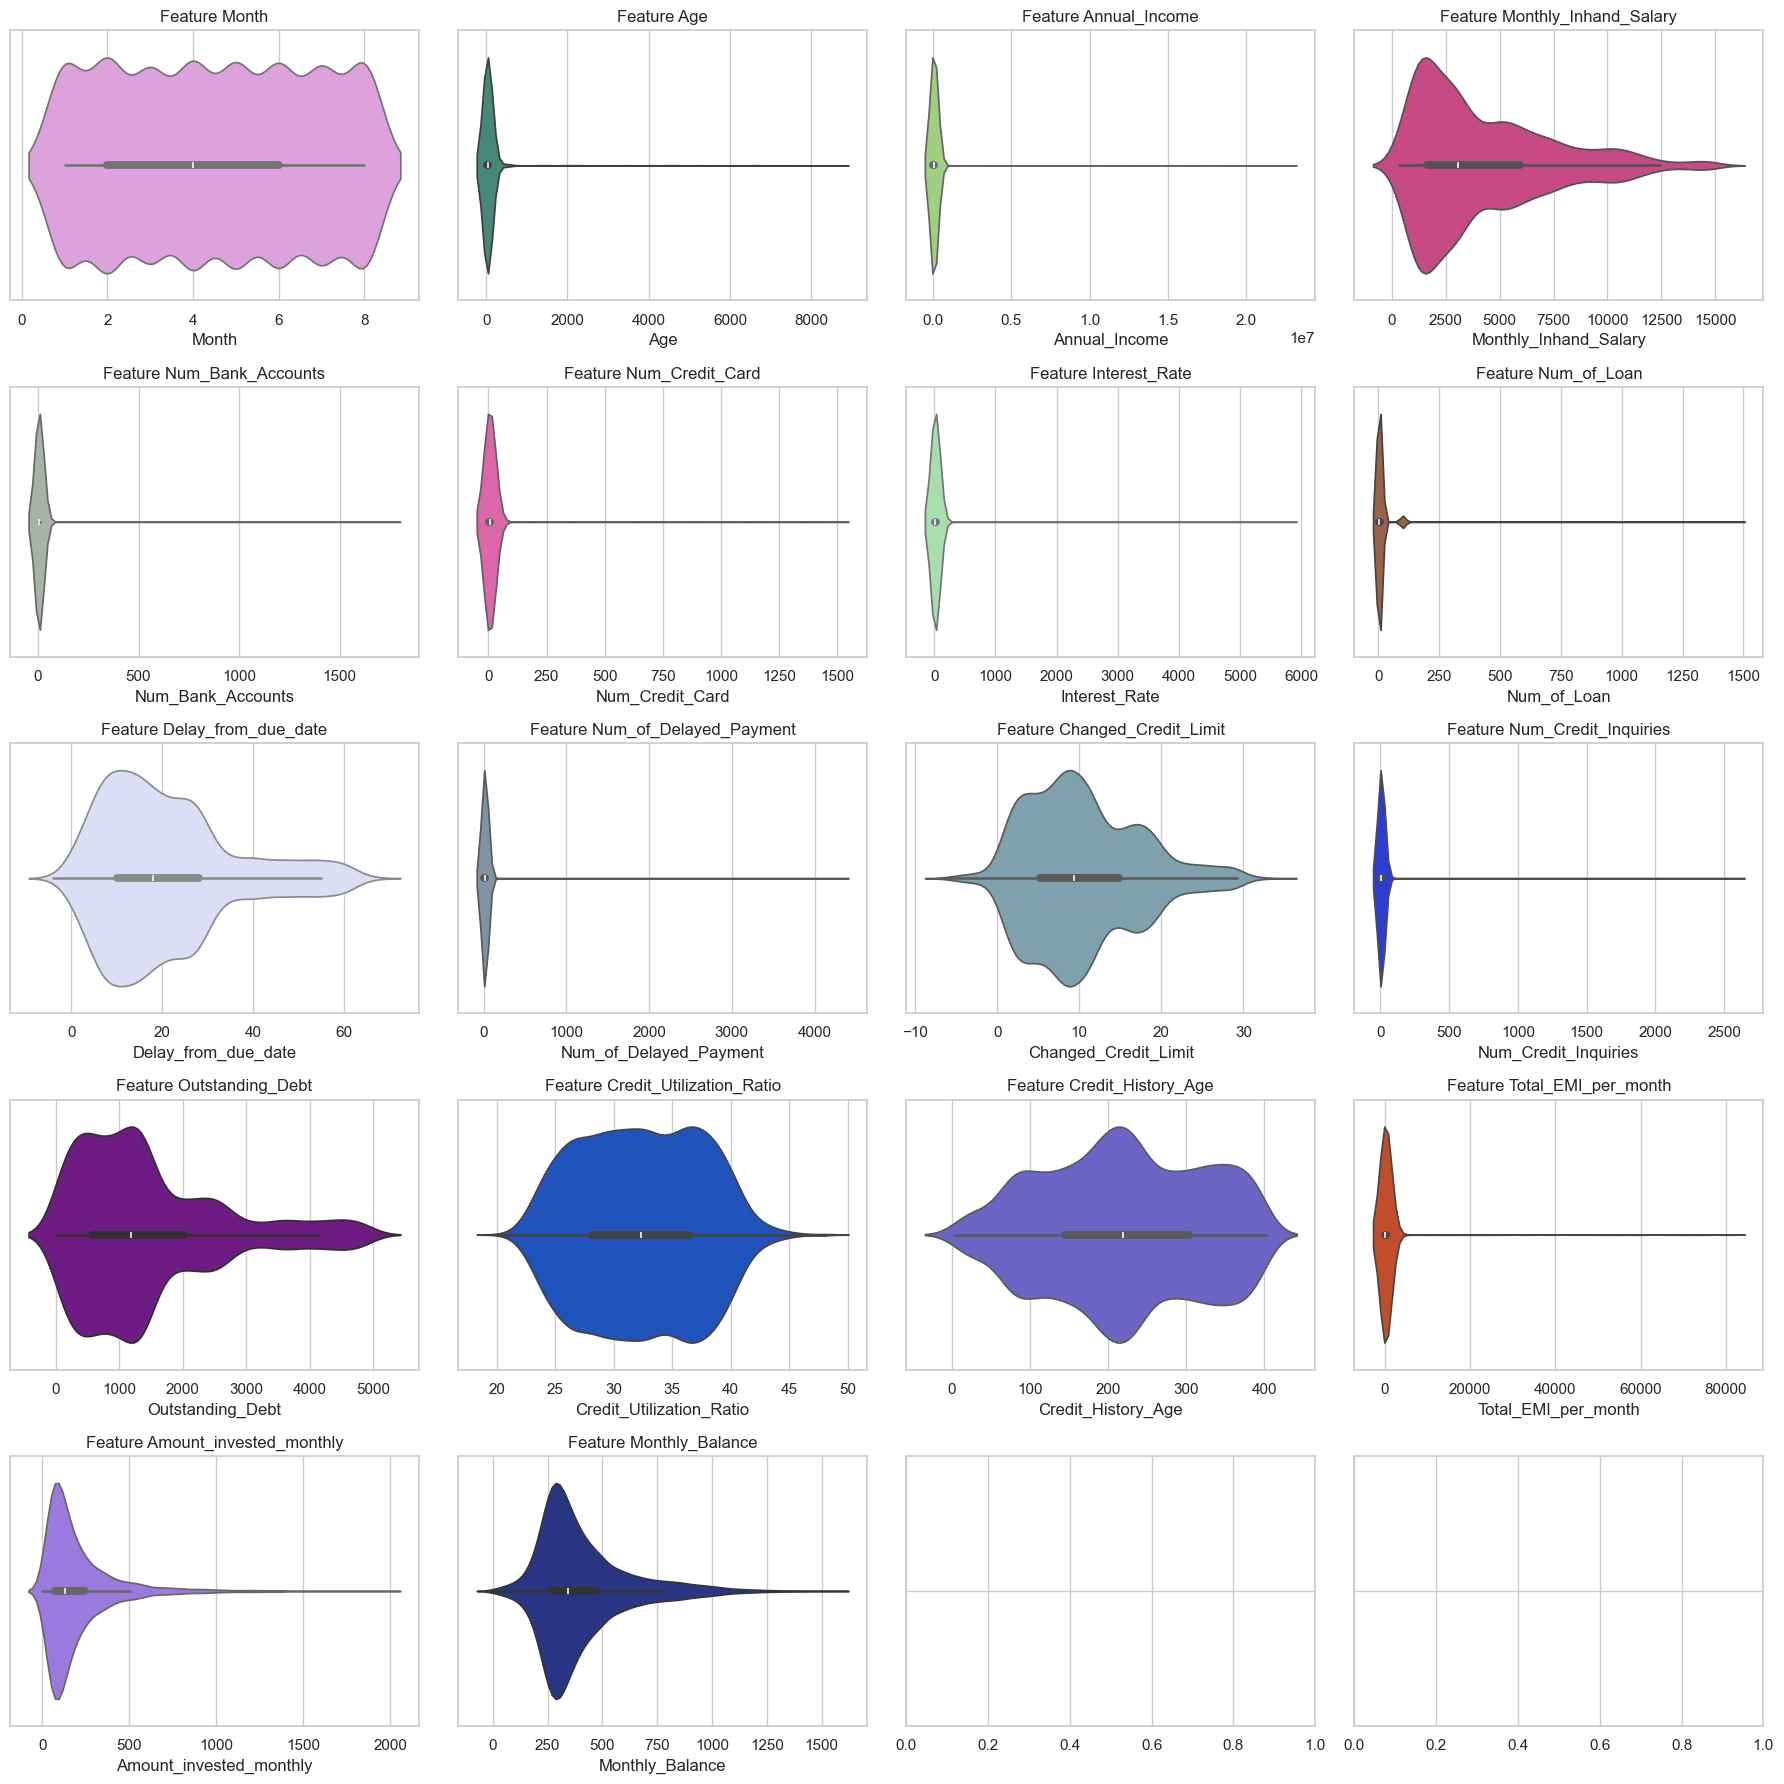

In [404]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(5, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  

plt.tight_layout()
plt.show()


Age

In [405]:
data[data['Age'] < 15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
69,0x64f5,CUS_0x4ff7,4,Chatterjeem,14,366-35-7290,Manager,16873.05,NaN,6,...,Bad,3600.43,27.468533,77.0,Yes,94.877309,64.981910,NaN,266.049531,Poor
78,0x22e2e,CUS_0x6896,5,Chestneye,14,975-47-9681,Media_Manager,31896.70,2832.058333,7,...,Standard,1941.65,32.256039,233.0,Yes,36.331742,43.673750,High_spent_Medium_value_payments,453.200341,Poor
142,0x16b2e,CUS_0x449,5,Reynoldsw,14,324-08-0373,Manager,46744.62,4111.385000,7,...,Standard,2009.75,33.952914,NaN,Yes,77.758561,365.853761,Low_spent_Small_value_payments,257.526178,Poor
213,0x167ce,CUS_0x1766,5,raden Reddalld,14,751-67-7414,Teacher,17849.00,1490.416667,6,...,Bad,4522.59,29.765943,122.0,Yes,88.005578,199.478787,Low_spent_Small_value_payments,151.557302,Poor
254,0x186c,CUS_0xb986,7,Simon Jessope,14,180-88-7800,Developer,39887.22,3224.935000,9,...,Bad,3119.60,24.148132,155.0,Yes,133.470845,111.667807,High_spent_Small_value_payments,337.354847,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,0x114b0,CUS_0x7036,3,Rhys Jonesk,14,991-19-9986,Entrepreneur,34506.14,NaN,10,...,Bad,3572.04,35.672775,137.0,Yes,116.660196,311.980544,Low_spent_Small_value_payments,164.610427,Poor
4625,0x1799c,CUS_0x3e40,3,Casey Sullivanj,14,090-24-7789,Developer,71267.18,NaN,7,...,NaN,158.20,31.256774,241.0,Yes,204.607492,312.117931,Low_spent_Medium_value_payments,380.067744,Standard
4686,0x12c9a,CUS_0x3610,5,Steve Slaters,14,908-07-4890,Mechanic,7371.66,521.305000,10,...,Standard,2276.26,26.216152,224.0,Yes,8.740465,24.406546,High_spent_Small_value_payments,278.983489,Standard
4781,0xd13e,CUS_0x7551,5,Busvinel,14,926-03-8333,Writer,10353.13,677.760833,7,...,NaN,2237.99,38.017614,NaN,Yes,55.303194,58.876607,Low_spent_Small_value_payments,243.596282,Standard


In [406]:
data[(data['Age'] < 14) | (data['Age'] > 70)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
26,0x18143,CUS_0x7d6c,6,Eileenc,500,NaN,Scientist,82405.98,7093.165000,5,...,NaN,218.44,36.535681,334.0,No,72.633969,417.744346,Low_spent_Small_value_payments,508.938185,Standard
62,0x175ae,CUS_0x57c2,5,ewich Noelx,5327,045-47-7252,Journalist,30789.41,2707.784167,5,...,Good,529.70,26.764434,381.0,No,0.000000,251.071303,Low_spent_Medium_value_payments,299.707113,Good
114,0x10a0a,CUS_0xa26b,1,Ros Krasnyp,500,NaN,Accountant,99657.51,8164.792500,7,...,Standard,113.12,24.135318,317.0,Yes,307.526381,792.214550,Low_spent_Small_value_payments,6.738319,Standard
130,0x24ce1,CUS_0x80ed,4,Protarde,6206,130-12-9232,Teacher,86262.20,7188.516667,0,...,Good,671.65,36.555560,NaN,No,127.025986,158.554121,High_spent_Medium_value_payments,683.271559,Poor
141,0x200dd,CUS_0x331a,8,Clare Baldwinr,500,708-93-5779,Developer,17767.41,NaN,6,...,NaN,2595.94,39.871384,125.0,Yes,65.489995,66.869093,Low_spent_Small_value_payments,298.402662,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,0x1e85f,CUS_0x7594,2,Langeo,1110,755-53-3944,Engineer,21642.16,2048.513333,8,...,NaN,1058.31,28.362516,161.0,Yes,33.058792,62.173299,High_spent_Medium_value_payments,359.619243,Standard
4779,0x2418d,CUS_0x8110,8,Andreio,500,967-93-3033,Manager,92942.40,7474.200000,5,...,Standard,147.78,24.624913,215.0,Yes,346.103617,949.932054,Low_spent_Medium_value_payments,490.558102,Standard
4829,0x25fa4,CUS_0x51b3,7,Ryana,1342,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,NaN,418.03,38.199635,247.0,No,26.778419,502.376320,Low_spent_Small_value_payments,251.731594,Standard
4894,0x7387,CUS_0x66bb,2,Caroline Valetkevitchu,6704,310-18-5191,Scientist,142665.96,10962.852931,8,...,Standard,474.50,41.669779,266.0,Yes,1102.977069,405.130494,High_spent_Medium_value_payments,1051.452506,Standard


In [407]:
min_Age = data['Age'].min()
data.loc[data['Age']<14, 'Age']=min_Age
data.loc[data['Age']>70, 'Age']=min_Age

min_Age = test['Age'].min()
test.loc[test['Age']<14, 'Age']=min_Age
test.loc[test['Age']>70, 'Age']=min_Age

In [408]:
data['Age'].describe()

count    4999.000000
mean       32.683537
std        11.041152
min        14.000000
25%        24.000000
50%        32.000000
75%        41.000000
max        56.000000
Name: Age, dtype: float64

Interest rate

In [409]:
min_Interest_Rate = data['Interest_Rate'].min()
data.loc[data['Interest_Rate']<1, 'Interest_Rate']=min_Interest_Rate
data.loc[data['Interest_Rate']>40, 'Interest_Rate']=min_Interest_Rate

min_Interest_Rate = test['Interest_Rate'].min()
test.loc[test['Interest_Rate']<1, 'Interest_Rate']=min_Interest_Rate
test.loc[test['Interest_Rate']>40, 'Interest_Rate']=min_Interest_Rate

In [410]:
data['Interest_Rate'].describe()

count    4999.000000
mean       14.343069
std         8.740085
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        34.000000
Name: Interest_Rate, dtype: float64

Annual Income

In [411]:
data['Annual_Income'].describe()

count    4.999000e+03
mean     1.872427e+05
std      1.447652e+06
min      7.021910e+03
25%      1.943372e+04
50%      3.744205e+04
75%      7.341920e+04
max      2.270538e+07
Name: Annual_Income, dtype: float64

In [412]:
min_Interest_Rate = data['Annual_Income'].min()
data.loc[data['Annual_Income']> 0.2e+06, 'Annual_Income']=min_Interest_Rate

min_Interest_Rate = test['Annual_Income'].min()
test.loc[test['Annual_Income']> 0.2e+06, 'Annual_Income']=min_Interest_Rate

In [413]:
data['Annual_Income'].describe()

count      4999.000000
mean      50303.238351
std       38749.146396
min        7021.910000
25%       19055.772500
50%       36270.250000
75%       71724.640000
max      179987.280000
Name: Annual_Income, dtype: float64

Num Credit Card

In [414]:
data['Num_Credit_Card'].describe()

count    4999.000000
mean       25.380276
std       140.271187
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max      1497.000000
Name: Num_Credit_Card, dtype: float64

In [415]:
min_Num_Credit_Card = data['Num_Credit_Card'].min()
data.loc[data['Num_Credit_Card']<1, 'Num_Credit_Card']=min_Num_Credit_Card
data.loc[data['Num_Credit_Card']>15, 'Num_Credit_Card']=min_Num_Credit_Card

min_Num_Credit_Card = test['Num_Credit_Card'].min()
test.loc[test['Num_Credit_Card']<1, 'Num_Credit_Card']=min_Num_Credit_Card
test.loc[test['Num_Credit_Card']>15, 'Num_Credit_Card']=min_Num_Credit_Card

In [416]:
data['Num_Credit_Card'].describe()

count    4999.000000
mean        5.418884
std         2.168422
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        11.000000
Name: Num_Credit_Card, dtype: float64

Num of Delayed Payment

In [417]:
data['Num_of_Delayed_Payment'].describe()

count    4683.000000
mean       30.449022
std       226.728218
min         0.000000
25%         9.000000
50%        14.000000
75%        18.000000
max      4326.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [418]:
min_Num_of_Delayed_Payment = data['Num_of_Delayed_Payment'].min()
data.loc[data['Num_of_Delayed_Payment']<1, 'Num_of_Delayed_Payment']=min_Num_of_Delayed_Payment
data.loc[data['Num_of_Delayed_Payment']>40, 'Num_of_Delayed_Payment']=min_Num_of_Delayed_Payment

min_Num_of_Delayed_Payment = test['Num_of_Delayed_Payment'].min()
test.loc[test['Num_of_Delayed_Payment']<1, 'Num_of_Delayed_Payment']=min_Num_of_Delayed_Payment
test.loc[test['Num_of_Delayed_Payment']>40, 'Num_of_Delayed_Payment']=min_Num_of_Delayed_Payment

In [419]:
data['Num_of_Delayed_Payment'].describe()

count    4683.000000
mean       13.235697
std         6.337335
min         0.000000
25%         9.000000
50%        14.000000
75%        18.000000
max        28.000000
Name: Num_of_Delayed_Payment, dtype: float64

Num Bank Accounts

In [420]:
min_Num_Bank_Accounts = data['Num_Bank_Accounts'].min()
data.loc[data['Num_Bank_Accounts']<1, 'Num_Bank_Accounts']=min_Num_Bank_Accounts
data.loc[data['Num_Bank_Accounts']>20, 'Num_Bank_Accounts']=min_Num_Bank_Accounts

min_Num_Bank_Accounts = test['Num_Bank_Accounts'].min()
test.loc[test['Num_Bank_Accounts']<1, 'Num_Bank_Accounts']=min_Num_Bank_Accounts
test.loc[test['Num_Bank_Accounts']>20, 'Num_Bank_Accounts']=min_Num_Bank_Accounts

In [421]:
data['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
 7     676
 6     643
 3     616
 4     602
 5     599
 8     598
-1     307
 9     272
 10    243
 2     236
 1     207
Name: count, dtype: int64

In [422]:
data['Num_Bank_Accounts'].describe()

count    4999.000000
mean        5.176035
std         2.777427
min        -1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Num_Bank_Accounts, dtype: float64

Num of Loan

In [423]:
data[data['Num_of_Loan']>10]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
36,0xf142,CUS_0x36f3,5,Michael Ermany,39,782-09-3485,Architect,57786.48,NaN,3,...,NaN,197.09,36.322936,186.0,Yes,81.780052,85.379995,High_spent_Small_value_payments,549.793953,Standard
38,0x1a821,CUS_0x3757,8,Kazunori Takadax,42,610-13-4952,Mechanic,32176.68,2399.390000,9,...,Standard,2464.30,39.522463,NaN,Yes,59.072791,63.104856,Low_spent_Large_value_payments,387.761353,Poor
84,0x23a37,CUS_0x2dca,2,Krishna Kumarm,27,NaN,Developer,14161.12,1284.093333,10,...,Bad,3754.62,23.406482,NaN,Yes,43.996155,123.289021,Low_spent_Medium_value_payments,241.124157,Poor
96,0x1185d,CUS_0xc49c,8,Kentaro Hamadaj,36,207-68-9585,Engineer,121813.72,9866.143333,5,...,Good,233.82,27.448916,283.0,No,57.143357,253.602075,High_spent_Medium_value_payments,925.868901,Good
103,0xe220,CUS_0xa011,7,Katharinao,19,NaN,Developer,31408.15,NaN,5,...,Standard,1408.66,31.738878,250.0,Yes,30.791883,96.011109,High_spent_Medium_value_payments,384.131591,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,0x1f6d1,CUS_0x9428,4,Stevej,30,637-66-0198,Engineer,49099.68,4075.967589,8,...,Bad,2172.68,31.030595,194.0,Yes,300.725692,63.613219,High_spent_Large_value_payments,277.125089,Standard
4959,0x63ee,CUS_0xbda9,5,Rickl,19,216-65-2934,Media_Manager,68845.08,5570.090000,10,...,Bad,1498.12,31.162880,186.0,Yes,300.255135,345.351669,High_spent_Small_value_payments,171.402196,Standard
4984,0x24497,CUS_0xb49,6,NaN,35,659-50-4581,Journalist,43849.26,3757.105000,3,...,Good,506.71,35.808181,343.0,NM,65.009201,347.414091,Low_spent_Large_value_payments,233.287208,Standard
4986,0x25cb9,CUS_0x3397,4,Sveap,45,097-59-6601,Developer,39800.36,3097.696667,8,...,Bad,4241.52,31.600774,13.0,NM,252.255601,110.257403,High_spent_Small_value_payments,207.256662,Standard


In [424]:
min_Num_of_Loan = data['Num_of_Loan'].min()
data.loc[data['Num_of_Loan']<1, 'Num_of_Loan']=min_Num_of_Loan
data.loc[data['Num_of_Loan']>10, 'Num_of_Loan']=min_Num_of_Loan

min_Num_of_Loan = test['Num_of_Loan'].min()
test.loc[test['Num_of_Loan']<1, 'Num_of_Loan']=min_Num_of_Loan
test.loc[test['Num_of_Loan']>10, 'Num_of_Loan']=min_Num_of_Loan

In [425]:
data['Num_of_Loan'].describe()

count    4999.000000
mean        3.330666
std         2.533900
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         9.000000
Name: Num_of_Loan, dtype: float64

Total EMI per month

In [426]:
min_Total_EMI_per_month = data['Total_EMI_per_month'].min()
data.loc[data['Total_EMI_per_month']<1, 'Total_EMI_per_month']=min_Total_EMI_per_month
data.loc[data['Total_EMI_per_month']>400, 'Total_EMI_per_month']=min_Total_EMI_per_month

min_Total_EMI_per_month = test['Total_EMI_per_month'].min()
test.loc[test['Total_EMI_per_month']<1, 'Total_EMI_per_month']=min_Total_EMI_per_month
test.loc[test['Total_EMI_per_month']>400, 'Total_EMI_per_month']=min_Total_EMI_per_month

In [427]:
data['Total_EMI_per_month'].describe()

count    4999.000000
mean       88.192170
std        89.300727
min         0.000000
25%        23.509095
50%        59.040752
75%       128.912522
max       399.750182
Name: Total_EMI_per_month, dtype: float64

Amount invested monthly

In [428]:
min_Amount_invested_monthly = data['Amount_invested_monthly'].min()
data.loc[data['Amount_invested_monthly']<1, 'Amount_invested_monthly']=min_Amount_invested_monthly
data.loc[data['Amount_invested_monthly']>800, 'Amount_invested_monthly']=min_Amount_invested_monthly

min_Amount_invested_monthly = test['Amount_invested_monthly'].min()
test.loc[test['Amount_invested_monthly']<1, 'Amount_invested_monthly']=min_Amount_invested_monthly
test.loc[test['Amount_invested_monthly']>800, 'Amount_invested_monthly']=min_Amount_invested_monthly

In [429]:
data['Amount_invested_monthly'].describe()

count    4614.000000
mean      172.270294
std       154.098929
min         0.000000
25%        66.165803
50%       120.534754
75%       225.777800
max       798.582241
Name: Amount_invested_monthly, dtype: float64

In [430]:
min_Num_Credit_Inquiries = data['Num_Credit_Inquiries'].min()
data.loc[data['Num_Credit_Inquiries']<1, 'Num_Credit_Inquiries']=min_Num_Credit_Inquiries
data.loc[data['Num_Credit_Inquiries']>20, 'Num_Credit_Inquiries']=min_Num_Credit_Inquiries

min_Num_Credit_Inquiries = test['Num_Credit_Inquiries'].min()
test.loc[test['Num_Credit_Inquiries']<1, 'Num_Credit_Inquiries']=min_Num_Credit_Inquiries
test.loc[test['Num_Credit_Inquiries']>20, 'Num_Credit_Inquiries']=min_Num_Credit_Inquiries

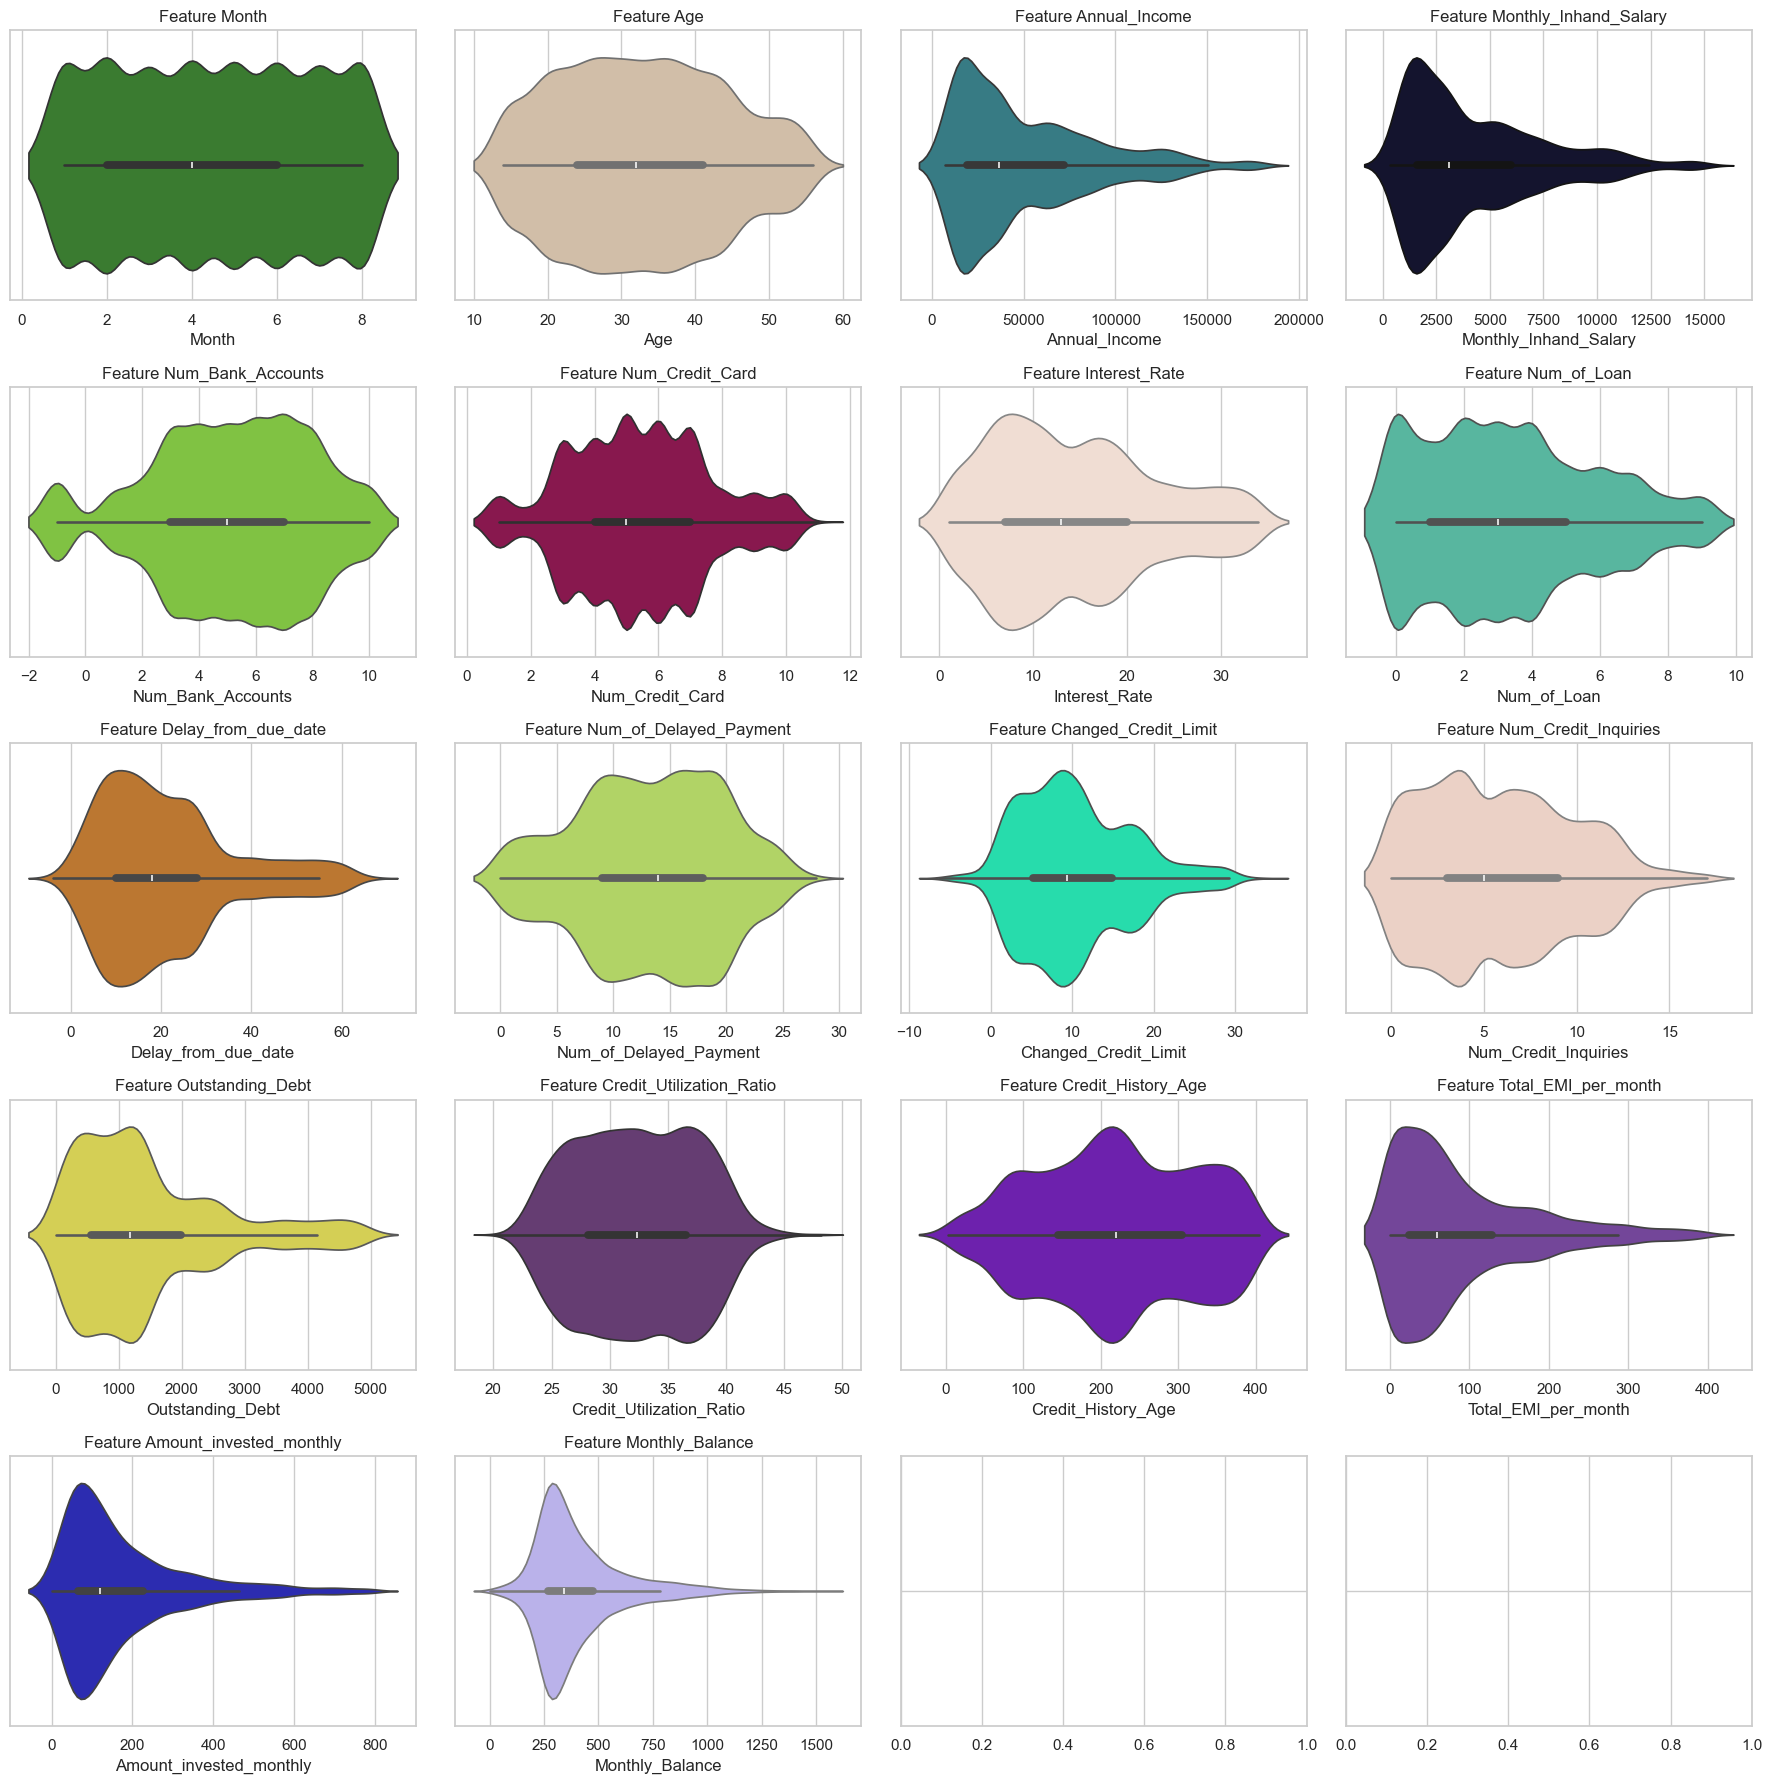

In [431]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(5, 4, figsize=(18, 18), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  


plt.tight_layout()

plt.show()

In [432]:
print(data.columns)
print(data.dtypes)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')
ID                           object
Customer_ID                  object
Month                         int64
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_R

Hint: After Filling the data

In [433]:
numerical_columns = data.select_dtypes(include=['number'])
numerical_columns

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1,33,19667.73,1594.977500,10,9,19,8,32,17.0,19.73,7.0,4526.89,27.611557,NaN,99.811139,91.169509,258.517102
1,8,33,128501.80,10624.483333,3,8,7,3,10,3.0,1.25,0.0,833.92,37.460854,352.0,175.347940,245.277355,881.823038
2,2,35,125264.96,NaN,4,3,3,0,27,8.0,5.53,0.0,950.59,35.305841,302.0,0.000000,691.604248,608.870419
3,7,39,25876.18,2293.348333,4,6,7,3,0,15.0,10.29,4.0,71.54,36.241526,260.0,37.374350,58.293167,383.667317
4,5,45,36592.92,2904.410000,-1,7,9,2,30,15.0,7.98,4.0,1301.92,26.547590,276.0,43.282940,221.375733,305.782326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2,36,18508.07,1678.339167,9,6,23,5,41,28.0,20.44,9.0,3019.17,36.244770,3.0,64.888608,86.027798,276.917511
4995,2,50,22879.52,1704.626667,5,6,1,0,15,8.0,12.41,0.0,902.29,29.873849,NaN,0.000000,NaN,337.390021
4996,6,39,108457.74,9298.145000,6,7,13,4,5,17.0,11.42,4.0,640.11,39.690330,NaN,238.850443,457.752460,493.211597
4997,5,40,31700.08,2710.673333,-1,7,29,8,54,14.0,25.48,12.0,4031.88,36.235403,29.0,189.414029,29.534775,292.118529


In [434]:
data.Credit_Score.value_counts()

Credit_Score
Standard    2655
Poor        1460
Good         884
Name: count, dtype: int64

<h1><b>Data Visualization</b></h1>

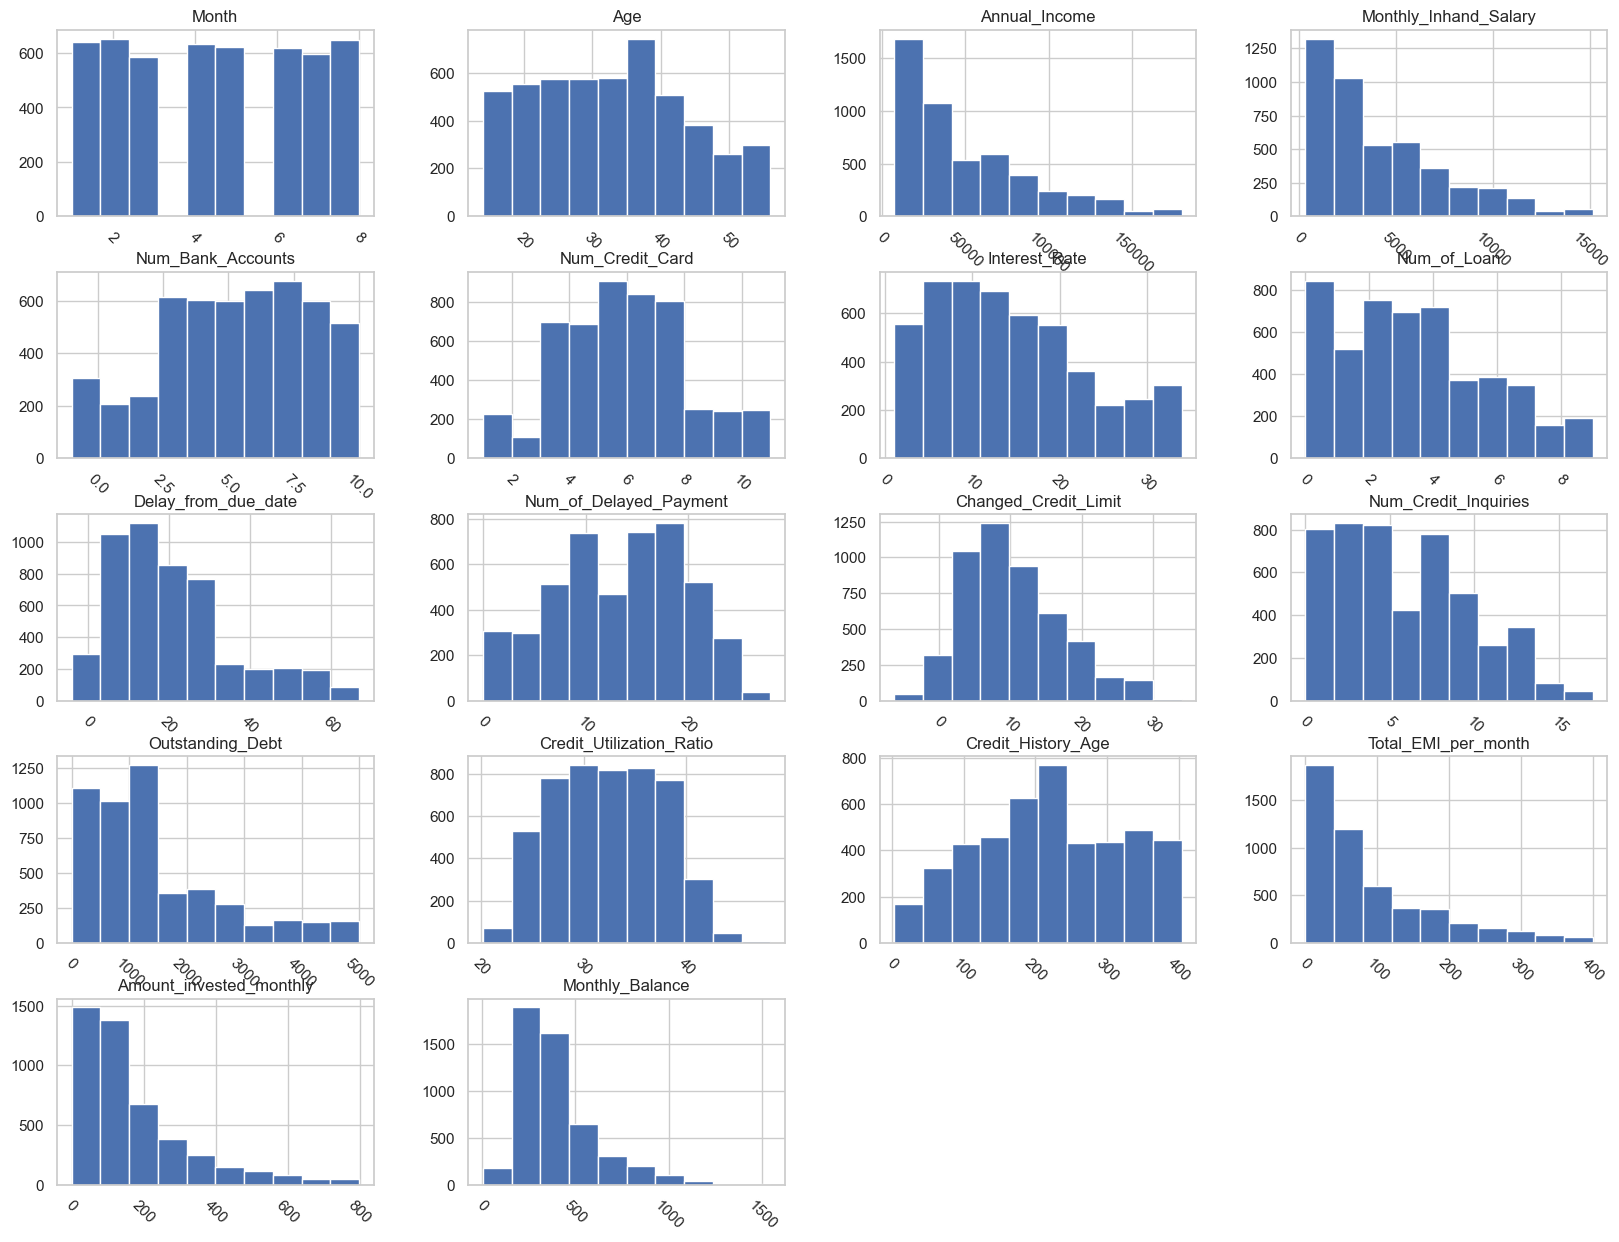

In [435]:
df=data.copy()
df.hist(figsize=(20,15), xrot=-45)
plt.show()

<h2>ploting our target 🎯</h2>

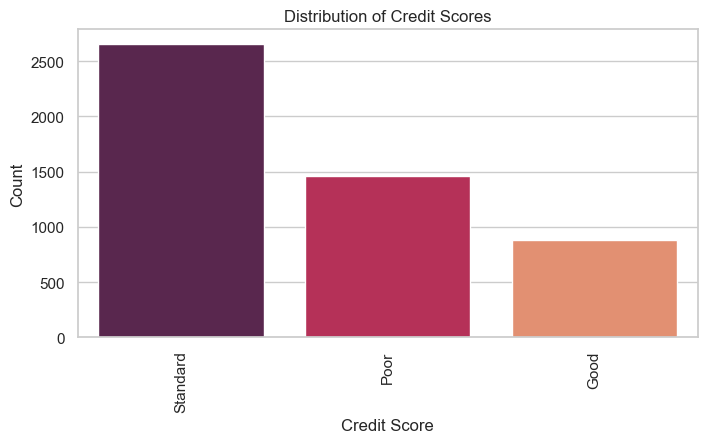

In [436]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Credit_Score', palette='rocket')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.xticks(rotation=90)  
plt.show()

<h2>Factor 1 : Personal information</h2>

What is effect of age on target ?

In [437]:
df['Age'].unique()

array([33, 35, 39, 45, 42, 53, 40, 37, 18, 36, 30, 44, 38, 25, 34, 27, 55,
       29, 47, 14, 46, 19, 28, 31, 17, 50, 54, 41, 21, 20, 43, 15, 22, 26,
       32, 51, 49, 24, 16, 23, 52, 56, 48])

<Axes: xlabel='Age', ylabel='Density'>

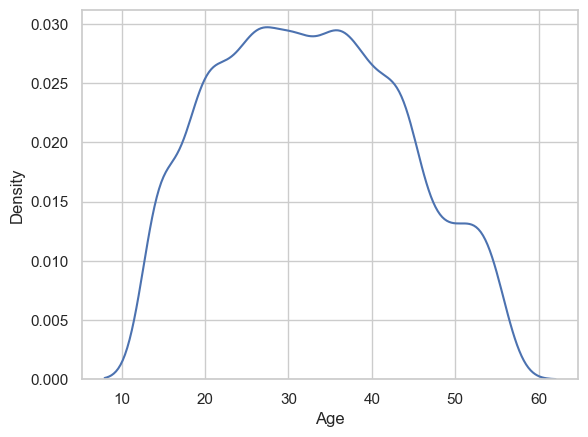

In [438]:
sns.kdeplot(df['Age'])

In [439]:
# Define the age groups and their corresponding labels
age_bins = [14, 24, 34, 44, 54, 64, 74]
age_labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65-74']

# Create the "Grouped_Age" column
df['Grouped_Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows to verify the new column
print(df[['Age', 'Grouped_Age']].head())

   Age Grouped_Age
0   33       25-34
1   33       25-34
2   35       35-44
3   39       35-44
4   45       45-54


<Axes: xlabel='Grouped_Age', ylabel='count'>

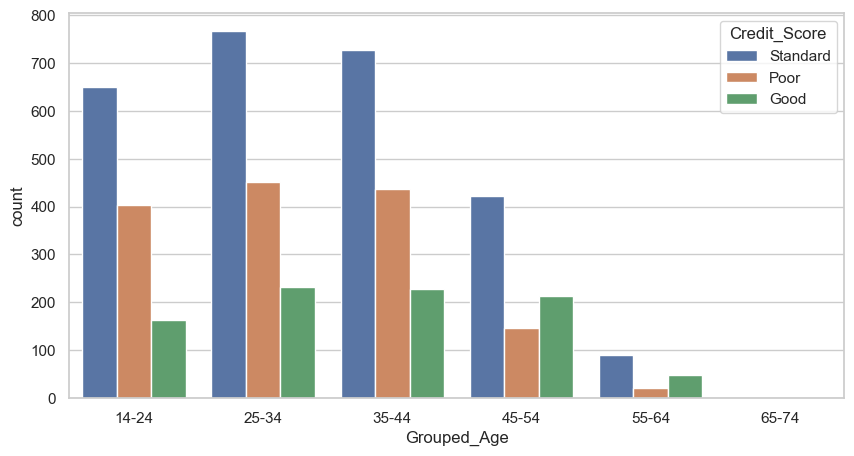

In [440]:
# Now, use the filtered DataFrame for the countplot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Grouped_Age', hue='Credit_Score')

Does Occupation play a role?

In [441]:
df['Occupation'].unique()

array([nan, 'Mechanic', 'Journalist', 'Manager', 'Entrepreneur',
       'Architect', 'Developer', 'Doctor', 'Scientist', 'Accountant',
       'Musician', 'Media_Manager', 'Writer', 'Teacher', 'Lawyer',
       'Engineer'], dtype=object)

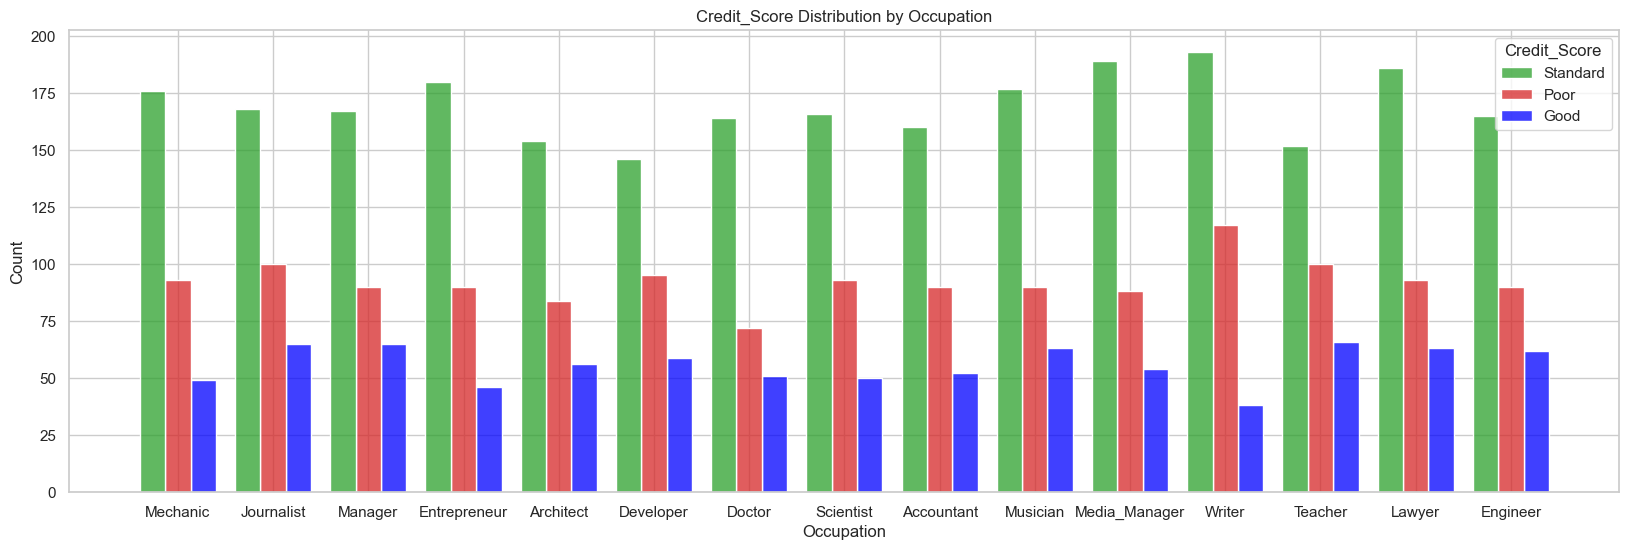

In [442]:
colors = ["#2ca02c", "#d62728", 'blue']

# Set custom figure dimensions
plt.figure(figsize=(20, 6))

# Create the histogram plot with customized colors and dimensions
sns.histplot(data=df, x="Occupation", hue="Credit_Score", multiple="dodge", shrink=.8, palette=colors)

# Customize other plot properties like titles, labels, etc.
plt.title("Credit_Score Distribution by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")

# Display the plot
plt.show()

Which occupation tends to have higher outstanding debt?

In [443]:
occupation_distribution=df['Occupation'].value_counts()
occupation_distribution

Occupation
Writer           348
Lawyer           342
Journalist       333
Media_Manager    331
Musician         330
Manager          322
Mechanic         318
Teacher          318
Engineer         317
Entrepreneur     316
Scientist        309
Accountant       302
Developer        300
Architect        294
Doctor           287
Name: count, dtype: int64

In [444]:
col_df =df.groupby('Occupation')['Outstanding_Debt'].mean().reset_index().sort_values(by='Outstanding_Debt', ascending=False)

# Create a bar plot using Plotly Express
fig = px.bar(col_df, x='Occupation', y='Outstanding_Debt', title='Mean Outstanding Debt by Occupation')
fig.update_layout(xaxis_title='Occupation', yaxis_title='Mean Outstanding Debt')
fig.show()

Which occupation group have highest and lowest number of loan ?

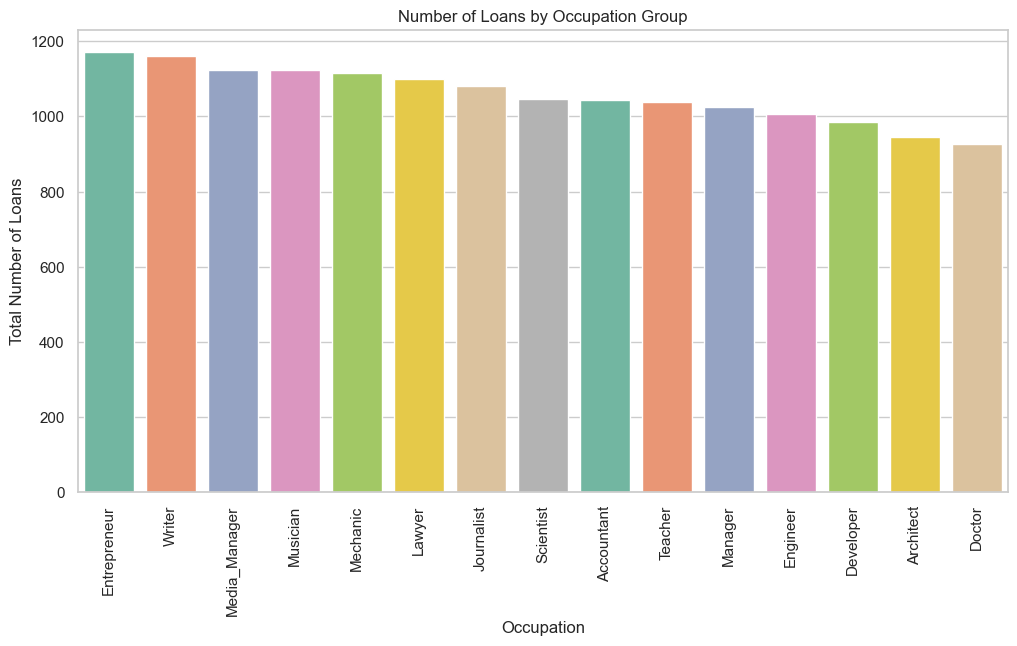

In [445]:
# Calculate the total number of loans for each occupation group
occupation_loan_counts = df.groupby('Occupation')['Num_of_Loan'].sum().reset_index()

# Sort the data to find the occupation group with the highest and lowest number of loans
occupation_loan_counts = occupation_loan_counts.sort_values(by='Num_of_Loan', ascending=False)

# Create a bar plot to visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(data=occupation_loan_counts, x='Occupation', y='Num_of_Loan', palette='Set2')
plt.xlabel('Occupation')
plt.ylabel('Total Number of Loans')
plt.title('Number of Loans by Occupation Group')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<h2>Factor 2 : Financial information 💵</h2>

How Annual_salary Affect on our target?

In [446]:
credit_good = df[df.Credit_Score == 'Good']
credit_good.Annual_Income.describe()

count       884.000000
mean      63579.090905
std       43818.805181
min        7021.910000
25%       29146.600000
50%       43922.320000
75%       90406.717500
max      179193.760000
Name: Annual_Income, dtype: float64

In [447]:
credit_std = df[df.Credit_Score == 'Standard']
credit_std.Annual_Income.describe()

count      2655.000000
mean      51497.877712
std       39036.060978
min        7021.910000
25%       19477.585000
50%       36039.180000
75%       73447.145000
max      179948.840000
Name: Annual_Income, dtype: float64

In [448]:
credit_poor = df[df.Credit_Score == 'Poor']
credit_poor.Annual_Income.describe()

count      1460.000000
mean      40092.538925
std       31558.001533
min        7021.910000
25%       16598.670000
50%       32187.390000
75%       57158.275000
max      179987.280000
Name: Annual_Income, dtype: float64

In [449]:
credit = {
    'Good' : credit_good.Annual_Income.mean(),
    'Standard' : credit_std.Annual_Income.mean(),
    'Poor' : credit_poor.Annual_Income.mean()
}

count = {
    'Good' : credit_good.Annual_Income.count(),
    'Standard' : credit_std.Annual_Income.count(),
    'Poor' : credit_poor.Annual_Income.count()
}

fig = px.bar(x=list(count.keys()), y=list(count.values()), labels={'x': 'Credit Score', 'y': 'Annual Income'}, title='Variation in Annual Income with Change in Credit Score')
fig.update_traces(marker_color='blue', width=0.4)

fig.add_trace(px.scatter(x=list(credit.keys()), y=list(credit.values()),color_discrete_sequence=['white'] ,labels={'x': 'Credit Score', 'y': 'User'}).data[0])
fig.update_xaxes(type='category')  

fig.update_layout(
    plot_bgcolor='gray', paper_bgcolor='gray',
                        title_font=dict(size=25, color='white', family="Muli, sans-serif"),
    font=dict(color='white',size=15)
)

fig.show()

does the monthly inhand salary affect the target?

<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

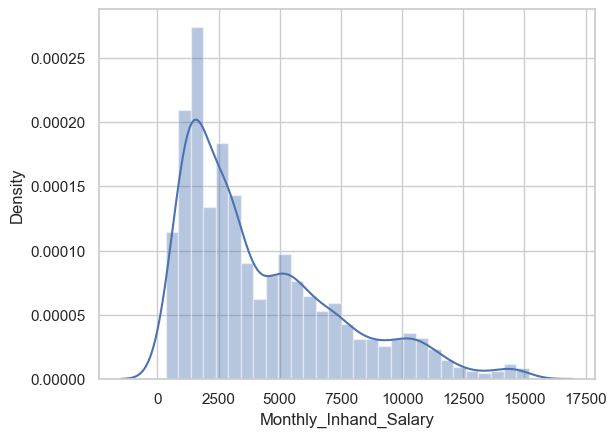

In [450]:
sns.distplot(df['Monthly_Inhand_Salary'])

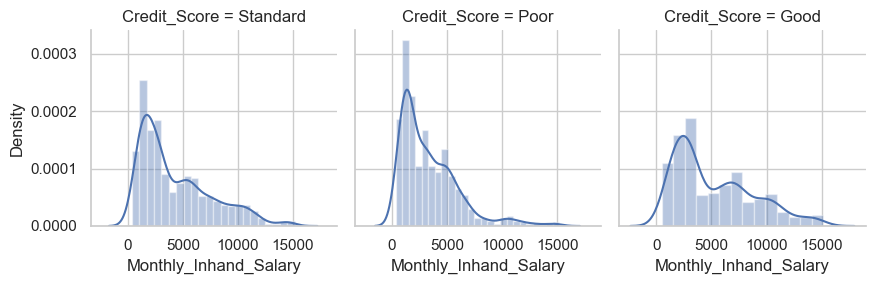

In [451]:
grid = sns.FacetGrid(df, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

<h2>Factor 3 : Bank transactions</h2>

How does number of bank accounts affect the target?

In [452]:
credit_score = df['Credit_Score']
num_bank_accounts = df['Num_Bank_Accounts']

# Exploratory Data Analysis
print("Summary Statistics:")
print(df[['Credit_Score', 'Num_Bank_Accounts']].describe())

Summary Statistics:
       Num_Bank_Accounts
count        4999.000000
mean            5.176035
std             2.777427
min            -1.000000
25%             3.000000
50%             5.000000
75%             7.000000
max            10.000000


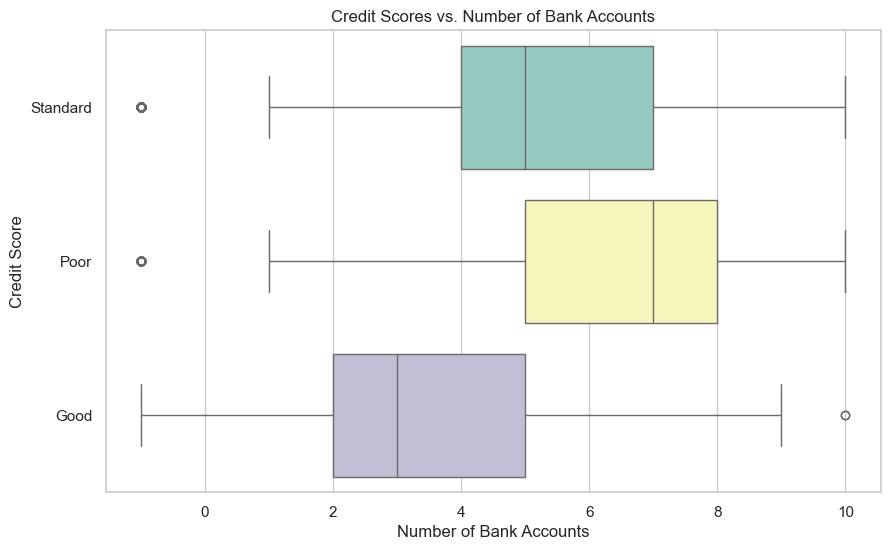

In [453]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Bank_Accounts', y='Credit_Score', data=df, palette="Set3")
plt.title('Credit Scores vs. Number of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Credit Score')
plt.show()

Does the number of credit inquiries made by a customer impact their credit score? Is there an optimal number of inquiries to maintain a good credit score?

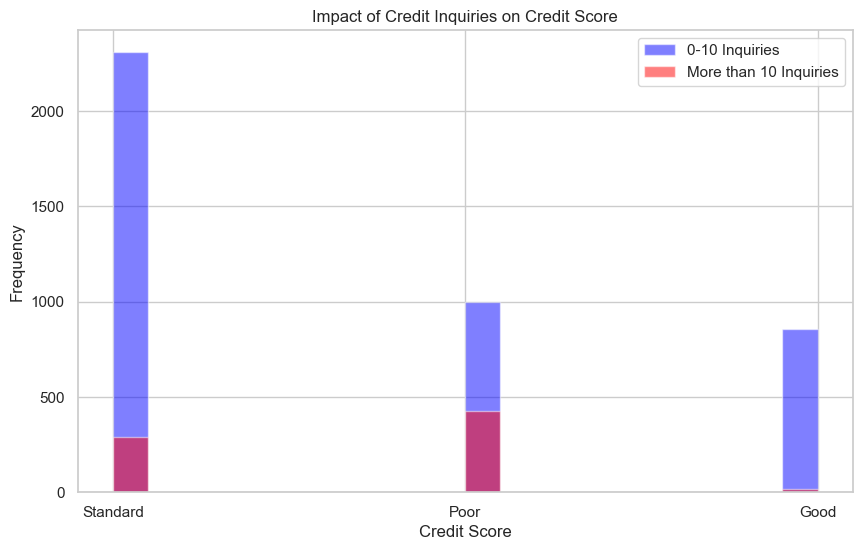

In [454]:
# Create a histogram to visualize the distribution of credit scores for different numbers of credit inquiries
plt.figure(figsize=(10, 6))
plt.hist(df[df['Num_Credit_Inquiries'] <= 10]['Credit_Score'], bins=20, alpha=0.5, label='0-10 Inquiries', color='blue')
plt.hist(df[df['Num_Credit_Inquiries'] > 10]['Credit_Score'], bins=20, alpha=0.5, label='More than 10 Inquiries', color='red')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Impact of Credit Inquiries on Credit Score')
plt.legend()
plt.grid(True)
plt.show()

What is the relationship between a customer's credit card utilization ratio and their payment behavior? How can we incentivize customers to use their cards more responsibly?

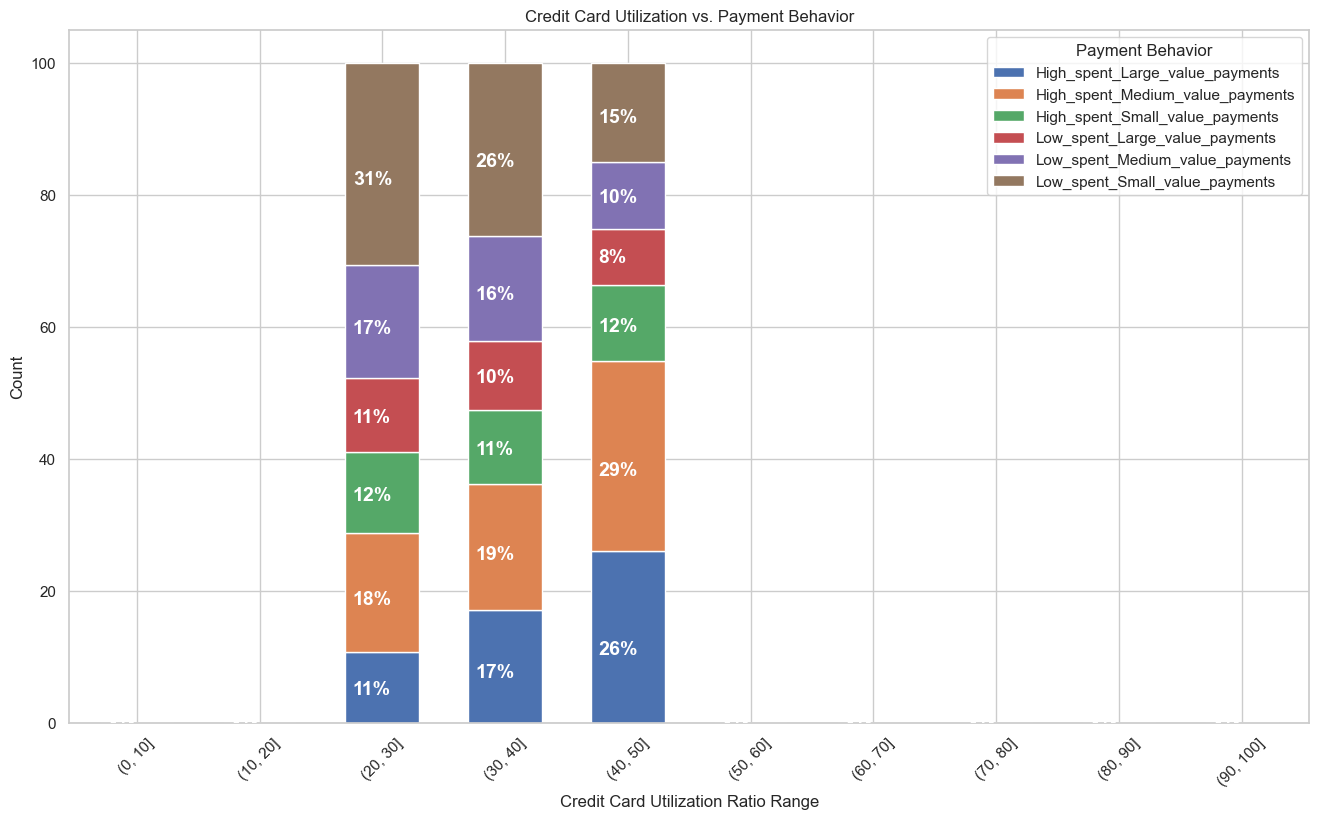

In [455]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df['Utilization_Ratio_Bin'] = pd.cut(df['Credit_Utilization_Ratio'], bins)

grouped = df.groupby(['Utilization_Ratio_Bin', 'Payment_Behaviour']).size().unstack(fill_value=0)

ax = (grouped.T * 100.0 / grouped.T.sum()).T.plot(
    kind='bar',
    width=0.6,  # Increase the bar width
    rot=0,
    stacked=True,
    figsize=(16, 9)  # Adjust the figure size
)

ax.plot()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        '{:.0f}%'.format(height),
        (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )

plt.title('Credit Card Utilization vs. Payment Behavior')
plt.xlabel('Credit Card Utilization Ratio Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Behavior')

plt.show()

The Payment behaviour with the credit score

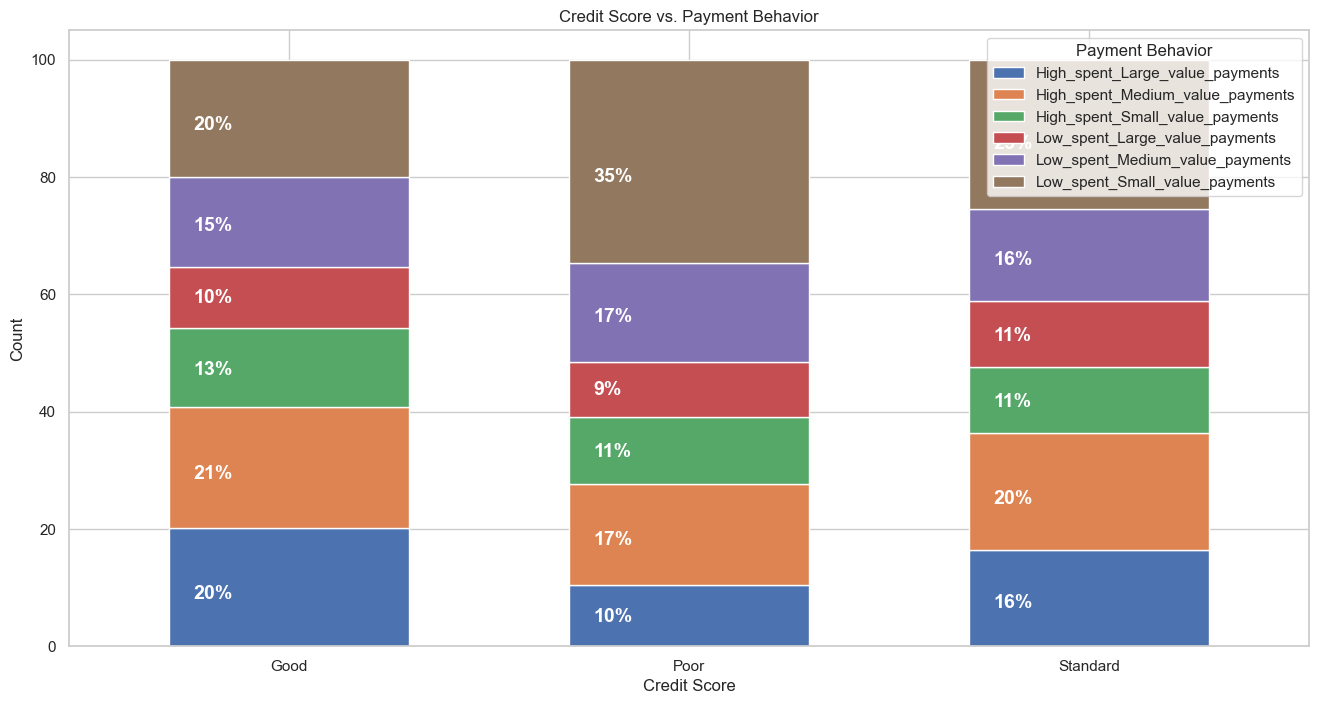

In [456]:
grouped = df.groupby(['Credit_Score', 'Payment_Behaviour']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = (grouped.T * 100.0 / grouped.T.sum()).T.plot(
    kind='bar',
    width=0.6,
    rot=0,
    stacked=True,
    figsize=(16, 8)
)

# Add annotations to the bars
ax.plot()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        '{:.0f}%'.format(height),
        (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )

# Customize the plot
plt.title('Credit Score vs. Payment Behavior')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Behavior')

plt.show()

Checking for im balance data

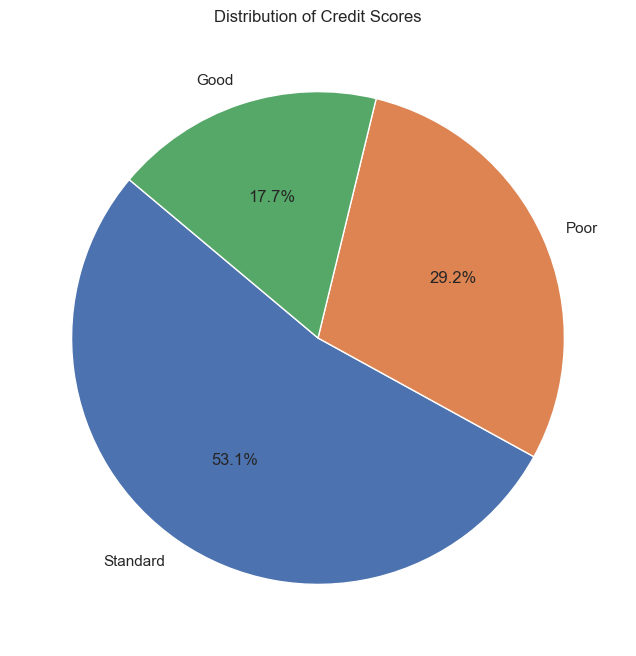

In [457]:
# Assuming your dataset is in a DataFrame named 'df'
# Create a histogram to count the number of customers in each credit score range
plt.figure(figsize=(8, 8))
plt.pie(df['Credit_Score'].value_counts(), labels=data['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()

<h1><b>Encoding</b></h1>

In [458]:
data.ID = data.ID.apply(lambda x: int(x,16)).astype(np.int64)
data.Customer_ID = data.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)

test.ID = test.ID.apply(lambda x: int(x,16)).astype(np.int64)
test.Customer_ID = test.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)

In [459]:
data.head()
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,125748,48498,7,Annav,38,349-96-0929,Journalist,14850.16,976.513333,7,...,Standard,543.37,38.696638,77.0,Yes,34.179094,36.966227,High_spent_Medium_value_payments,276.506013,Good
1,32025,17460,4,McCoolo,30,949-12-7408,Scientist,7087.24,361.603333,8,...,Standard,54.25,29.404696,NaN,Yes,22.301940,29.620058,Low_spent_Small_value_payments,274.238335,Standard
2,84060,31859,7,Foo Yuno,42,737-28-4078,Architect,57842.04,4864.170000,8,...,Bad,1600.43,25.567259,80.0,Yes,271.314179,38.874096,High_spent_Large_value_payments,416.228725,Poor
3,94316,50001,3,NaN,24,820-13-9455,Doctor,17366.08,1365.173333,6,...,NaN,133.38,30.464762,227.0,Yes,12.974549,NaN,Low_spent_Medium_value_payments,353.740289,Standard
4,79957,16245,8,Nigelr,55,841-56-7167,Media_Manager,28105.59,2133.132500,1,...,Good,151.29,26.622571,NaN,No,54.999938,30.965442,High_spent_Medium_value_payments,377.347869,Standard


In [460]:
columns=[
      'Credit_Score']
for item in columns:
    data[item] = LabelEncoder().fit_transform(data[item])
    test[item] = LabelEncoder().fit_transform(test[item])

In [461]:
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix','Type_of_Loan']
for item in columns:
    data[item] = ce.LeaveOneOutEncoder().fit_transform(data[item],data['Credit_Score'])
    test[item] = ce.LeaveOneOutEncoder().fit_transform(test[item],test['Credit_Score'])
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,80394,28083,1,1.354271,33,588-36-6834,1.285714,19667.73,1594.977500,10,...,1.353965,4526.89,27.611557,NaN,1.523194,99.811139,91.169509,1.367932,258.517102,2
1,80521,19465,8,2.000000,33,271-16-7396,1.397476,128501.80,10624.483333,3,...,0.888547,833.92,37.460854,352.0,1.117581,175.347940,245.277355,1.332875,881.823038,2
2,81055,42254,2,1.354271,35,253-30-1664,1.310241,125264.96,NaN,4,...,0.889316,950.59,35.305841,302.0,1.118146,0.000000,691.604248,1.311712,608.870419,1
3,129888,49800,7,1.328063,39,470-59-7781,1.314642,25876.18,2293.348333,4,...,1.663857,71.54,36.241526,260.0,1.117581,37.374350,58.293167,1.359869,383.667317,2
4,150658,11437,5,1.354271,45,304-15-3108,1.422222,36592.92,2904.410000,-1,...,1.663857,1301.92,26.547590,276.0,1.523194,43.282940,221.375733,1.352168,305.782326,2


In [462]:
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Outstanding_Debt','Total_EMI_per_month']
for item in columns2:
    mean_encoding = data.groupby([item])['Credit_Score'].mean()
    data[item] = data[item].map(mean_encoding)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,80394,28083,1,1.354271,1.395161,588-36-6834,1.285714,2.0,1594.977500,10,...,1.353965,2.0,27.611557,NaN,1.523194,2.000000,91.169509,1.367932,2.0,2
1,80521,19465,8,2.000000,1.395161,271-16-7396,1.397476,2.0,10624.483333,3,...,0.888547,2.0,37.460854,1.666667,1.117581,2.000000,245.277355,1.332875,2.0,2
2,81055,42254,2,1.354271,1.284768,253-30-1664,1.310241,1.0,NaN,4,...,0.889316,1.0,35.305841,1.142857,1.118146,1.276622,691.604248,1.311712,1.0,1
3,129888,49800,7,1.328063,1.370629,470-59-7781,1.314642,2.0,2293.348333,4,...,1.663857,2.0,36.241526,1.500000,1.117581,2.000000,58.293167,1.359869,2.0,2
4,150658,11437,5,1.354271,1.365854,304-15-3108,1.422222,2.0,2904.410000,-1,...,1.663857,2.0,26.547590,1.000000,1.523194,2.000000,221.375733,1.352168,2.0,2


Text(0.5, 1.05, 'Pearson correlation of Features')

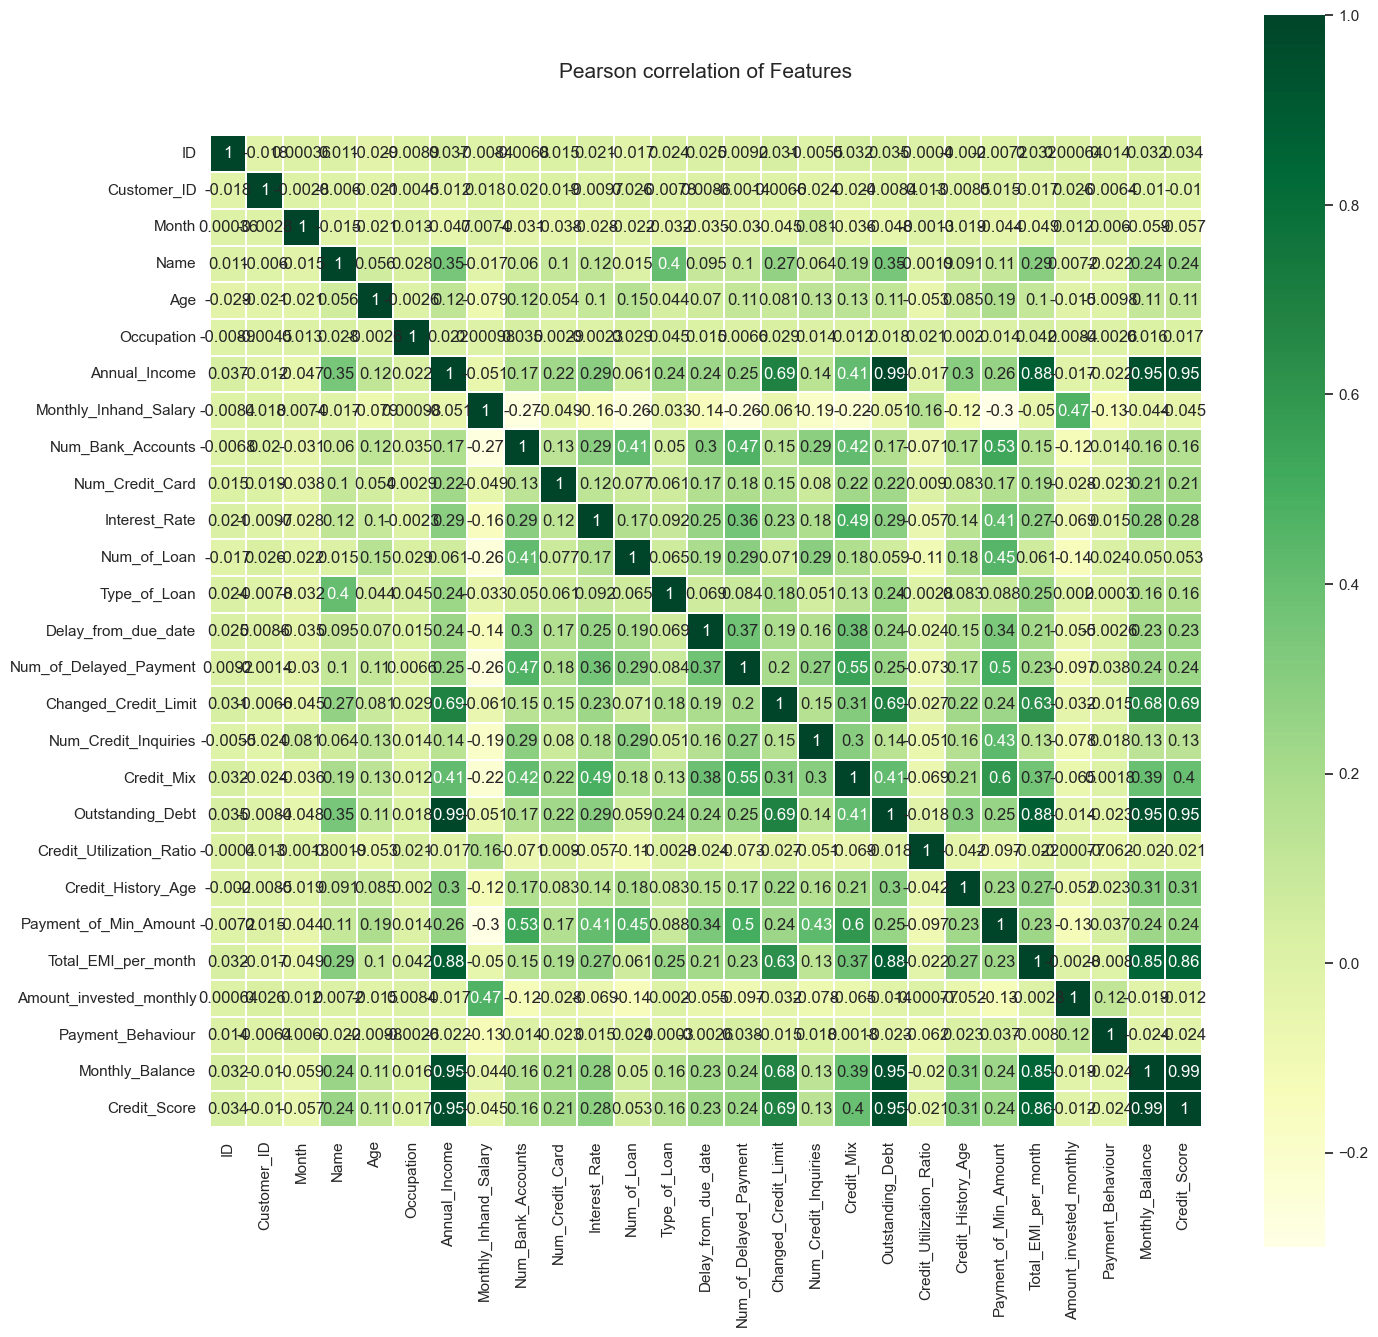

In [463]:
selected_columns = data.select_dtypes(include=['number'])
corr = selected_columns.corr()

f, ax = plt.subplots(figsize=(16,16))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

<h1><b>Modelling</b></h1>

Feature Selection

In [464]:
df=data.copy()
df.drop('SSN',axis=1,inplace=True)
df = df.dropna(axis=1)
X=df.drop('Credit_Score',axis=1)
y=df.Credit_Score

Use SMOTE to handle imbalanced classification problems by generating synthetic samples to balance the dataset, ensuring there are enough samples for each category to train the model. This helps improve model performance, especially when dealing with imbalanced data

In [465]:
smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

VIF Test

In [466]:
vif_data = pd.DataFrame()
vif_data["target"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,target,VIF
0,ID,4.407078
1,Customer_ID,4.277757
2,Month,5.187004
3,Name,14.620927
4,Age,297.576467
5,Occupation,712.437896
6,Annual_Income,127.649096
7,Num_Bank_Accounts,6.867982
8,Num_Credit_Card,67.960716
9,Interest_Rate,61.878875


Name, Annual Income, Number of Loans, and Outstanding Debt could be predicted by other independent variables in the dataset.

In [467]:
df=data.copy()
df.drop('SSN',axis=1,inplace=True)
df = df.dropna(axis=1)
tf=test.copy()
tf.drop('SSN',axis=1,inplace=True)
tf = df.dropna(axis=1)
VIFcolumns =['Name','Annual_Income','Num_of_Loan',
                           'Outstanding_Debt']
for item in VIFcolumns:
    df.drop(item,axis=1,inplace=True)
    tf.drop(item,axis=1,inplace=True)
X_train=df.drop('Credit_Score',axis=1)
y_train=df.Credit_Score
X_test=tf.drop('Credit_Score',axis=1)
y_test=tf.Credit_Score
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [468]:
X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [469]:
scaler = StandardScaler()
features = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features)

<h2>Decision Tree</h2>

<h3>Score Model in default Parameters</h3>

Training Data Set balanced accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.9978656240893102
Validation Mean balanced accuracy:  0.9979912115505336


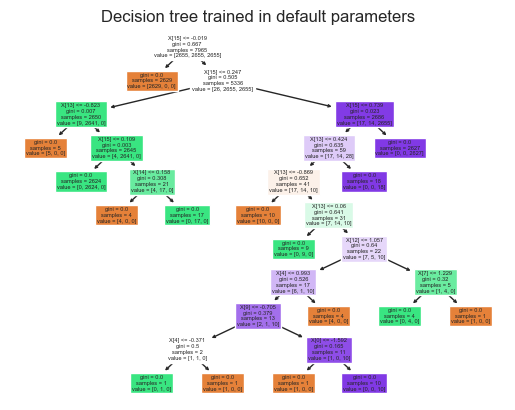

In [470]:
#Choose Classifier and fit the model use default attribute
DCT = DecisionTreeClassifier()
DCT.fit(X_train,y_train)
y_predict = DCT.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict,average='micro'))
print("Validation Mean F1 Score: ",cross_val_score(DCT,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(DCT,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())
#plot the decision tree with unlimited max depth
plot_tree(DCT, filled=True)
plt.title("Decision tree trained in default parameters")
plt.show()

<h3>Model Performance in different Parameter</h3>

In [471]:
#Grid Search
param_grid = [
        {
            'max_depth' : range(3,20),
            'min_samples_leaf' : range(6,20),
        }
       ]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'max_depth': 5, 'min_samples_leaf': 11}


<h3>Prediction Summary</h3>

In [472]:
DCT = DecisionTreeClassifier(max_depth=5,min_samples_leaf = 6)
t1=time()
DCT.fit(X_train,y_train)
y_predict = DCT.predict(X_test)
time_DCT = time()-t1

#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))

# balanced accuracy score
DCT_SC = balanced_accuracy_score(y_predict,y_test)
print(f"{round(DCT_SC*100,2)}% Accurate")
csc_DCT=round(DCT_SC*100,2)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2655
           1       0.99      1.00      1.00      2655
           2       1.00      1.00      1.00      2655

    accuracy                           1.00      7965
   macro avg       1.00      1.00      1.00      7965
weighted avg       1.00      1.00      1.00      7965

99.69% Accurate


<h3>Visualize Decision Tree</h3>

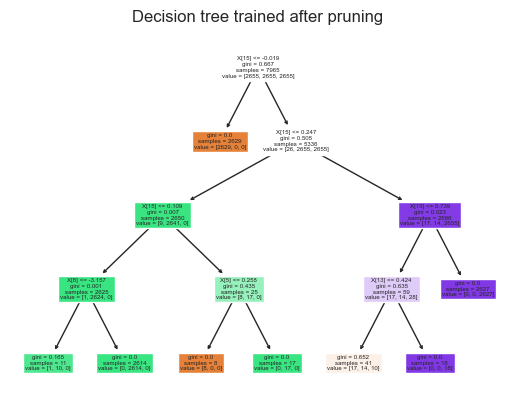

In [473]:
plt.figure()
tree_clf = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf = 6)
tree_clf.fit(X_train,y_train)
plot_tree(tree_clf, filled=True)
plt.title("Decision tree trained after pruning")
plt.show()

<h2>Neural Networks </h2>

In [474]:
#Choose Classifier and fit the model use default attribute
MLP = MLPClassifier()
MLP.fit(X_train, y_train)

y_predict = MLP.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict,average='micro'))
print("Validation Mean F1 Score: ",cross_val_score(MLP,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(MLP,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set balanced accuracy:  0.9998744507219084
Training Data F1 Score  0.9998744507219084
Validation Mean F1 Score:  0.9978658707691211
Validation Mean balanced accuracy:  0.9978656622724419


<h3>Model Performance in different Parameter</h3>

In [475]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'adam'],
            'hidden_layer_sizes': [
             (5,),(5,5),(5,5,5),(10,),(10,10),(10,10,10),(20,),(20,20),(50,)
             ]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


<h3>Prediction Summary</h3>

In [476]:
MLP_sum = MLPClassifier(solver='adam',hidden_layer_sizes=(5, 5),activation='logistic')
t1=time()
MLP_sum.fit(X_train, y_train)
y_predict = MLP_sum.predict(X_test)
time_MLP = time()-t1
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC1 = balanced_accuracy_score(y_predict,y_test)
print(f"{round(MLP_SC1*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2655
           1       0.99      1.00      1.00      2655
           2       1.00      1.00      1.00      2655

    accuracy                           1.00      7965
   macro avg       1.00      1.00      1.00      7965
weighted avg       1.00      1.00      1.00      7965

99.81% Accurate


In [477]:
MLP_sum2 = MLPClassifier(solver='adam',hidden_layer_sizes=(50,),activation='relu')
MLP_sum2.fit(X_train, y_train)
y_predict = MLP_sum2.predict(X_test)
#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))
# balanced accuracy score
MLP_SC2 = balanced_accuracy_score(y_predict,y_test)
print(f"{round(MLP_SC2*100,2)}% Accurate")
csc_MLP=round(max(MLP_SC1,MLP_SC2)*100,2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2655
           1       1.00      1.00      1.00      2655
           2       1.00      1.00      1.00      2655

    accuracy                           1.00      7965
   macro avg       1.00      1.00      1.00      7965
weighted avg       1.00      1.00      1.00      7965

100.0% Accurate


<h2>Boost (adaBoost)</h2>

In [478]:
#Choose Classifier and fit the model use default attribute
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)

y_predict = ADA.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict,average='micro'))
print("Validation Mean F1 Score: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set balanced accuracy:  0.9966101694915254
Training Data F1 Score  0.9966101694915255
Validation Mean F1 Score:  0.9822801176973481
Validation Mean balanced accuracy:  0.9822975517890772


<h3>Model Performance in different Parameter</h3>

In [479]:
#Grid Search
param_grid = [
        {
            'n_estimators' : range(1,100,10)
        }
       ]

clf = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'n_estimators': 11}


<h3>Prediction Summary</h3>

In [480]:
ADA = AdaBoostClassifier(n_estimators = 11)
t1=time()
ADA.fit(X_train, y_train)
y_predict = ADA.predict(X_test)
time_ADA = time()-t1

#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))

# balanced accuracy score
ADA_SC = balanced_accuracy_score(y_predict,y_test)
print(f"{round(ADA_SC*100,2)}% Accurate")
csc_Boost=round(ADA_SC*100,2)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      2655
           1       0.87      0.99      0.93      2655
           2       1.00      1.00      1.00      2655

    accuracy                           0.95      7965
   macro avg       0.95      0.95      0.95      7965
weighted avg       0.95      0.95      0.95      7965

95.22% Accurate


<h2>Logistic Regression</h2>

In [481]:
#Choose Classifier and fit the model use default attribute
LGR = LogisticRegression()
LGR.fit(X_train, y_train)

y_predict = LGR.predict(X_train)

# balanced accuracy score
print("Training Data Set balanced accuracy: ", balanced_accuracy_score(y_train,y_predict))
print("Training Data F1 Score ", f1_score(y_train,y_predict,average='micro'))
print("Validation Mean F1 Score: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean balanced accuracy: ",cross_val_score(ADA,X_train,y_train,cv=5,scoring='balanced_accuracy').mean())

Training Data Set balanced accuracy:  0.9963590709353422
Training Data F1 Score  0.9963590709353422
Validation Mean F1 Score:  0.9874548465742139
Validation Mean balanced accuracy:  0.987445072190835


<h3>Prediction Summary</h3>

In [482]:
LGR = LogisticRegression()
t1=time()
LGR.fit(X_train, y_train)
y_predict = LGR.predict(X_test)
time_LGR = time()-t1

#  prediction Summary by species
print(classification_report(y_true=y_test,y_pred=y_predict))

# balanced accuracy score
LGR_SC = balanced_accuracy_score(y_predict,y_test)
print(f"{round(LGR_SC*100,2)}% Accurate")
csc_Reg=round(LGR_SC*100,2)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2655
           1       0.99      1.00      0.99      2655
           2       1.00      1.00      1.00      2655

    accuracy                           1.00      7965
   macro avg       1.00      1.00      1.00      7965
weighted avg       1.00      1.00      1.00      7965

99.64% Accurate


<h2>Compare Prediction Performances by different models</h2>

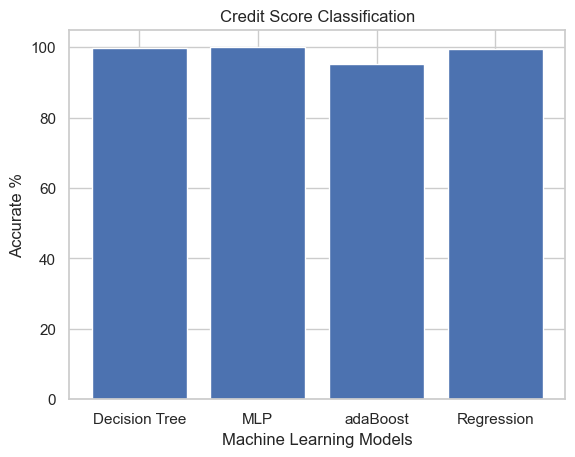

[99.69, 100.0, 95.22, 99.64]


In [483]:
data = [csc_DCT, csc_MLP, csc_Boost, csc_Reg]
labels = ['Decision Tree', 'MLP', 'adaBoost', 'Regression']
plt.bar(range(len(data)), data, tick_label=labels)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accurate %')
plt.title('Credit Score Classification')
plt.show()
print(data)

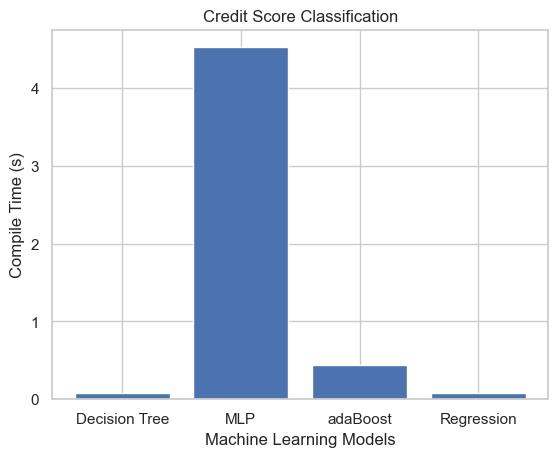

[0.08048796653747559, 4.522544860839844, 0.4439668655395508, 0.07773804664611816]


In [484]:
data = [time_DCT, time_MLP, time_ADA, time_LGR]
labels = ['Decision Tree', 'MLP', 'adaBoost', 'Regression']
plt.bar(range(len(data)), data, tick_label=labels)
plt.xlabel('Machine Learning Models')
plt.ylabel('Compile Time (s)')
plt.title('Credit Score Classification')
plt.show()
print(data)